In [1]:
import pickle
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
plt.rcParams["figure.figsize"] = (20,5)

## Combination of Layers

### First vs. Random

In [2]:
# functions for furthre useage
def mark_values(x_axis, y_axis):
    """
    mark the actul values on the plot
    :param x_axis: a list of x-axis values
    :type x_axis: list
    """
    for x, y in zip(x_axis, y_axis):
        label = "{:.2f}".format(y)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,8), # distance from text to points (x,y)
                     ha='center')

In [12]:
shares = (25, 50, 75, 100)
data_type = "full"
first_res_dict = {"train_con_auc": [], "train_con_accu": [],
                  "test_con_auc": [], "test_con_accu": [],
                  "train_diff_auc": [], "train_diff_accu": [],
                  "test_diff_auc": [], "test_diff_accu": [],
                  "train_ratio_auc": [], "train_ratio_accu": [],
                  "test_ratio_auc": [], "test_ratio_accu": [],
                  "train_log_auc": [], "train_log_accu": [],
                  "test_log_auc": [], "test_log_accu": []}
random_res_dict = {"train_con_auc": [], "train_con_accu": [],
                   "test_con_auc": [], "test_con_accu": [],
                   "train_diff_auc": [], "train_diff_accu": [],
                   "test_diff_auc": [], "test_diff_accu": [],
                   "train_ratio_auc": [], "train_ratio_accu": [],
                   "test_ratio_auc": [], "test_ratio_accu": [],
                   "train_log_auc": [], "train_log_accu": [],
                   "test_log_auc": [], "test_log_accu": []}
for share in shares:
    print(share)
    first_file = "../evals/comb_first_{}_{}.pkl".format(share, data_type)
    random_file = "../evals/comb_random_{}_{}.pkl".format(share, data_type)
    with open(first_file, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            first_res_dict[key].extend(res_dict[key])
    with open(random_file, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            random_res_dict[key].extend(res_dict[key])

25
50
75
100


Pearson correction coeffificent: nan
p-value: nan


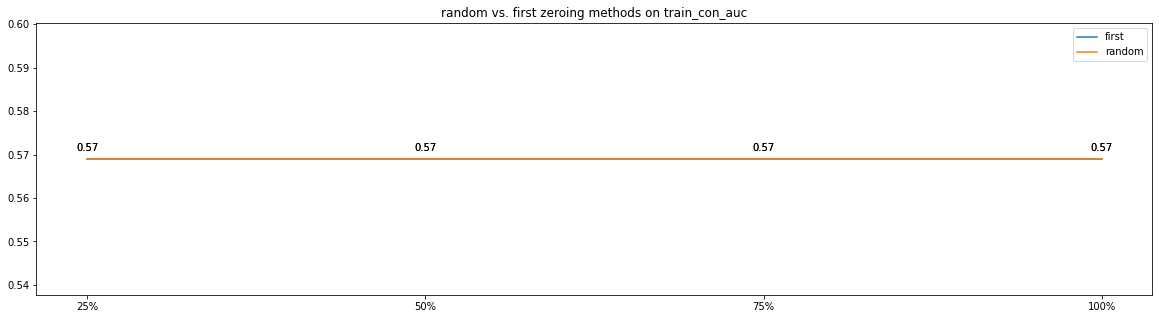

Pearson correction coeffificent: nan
p-value: nan


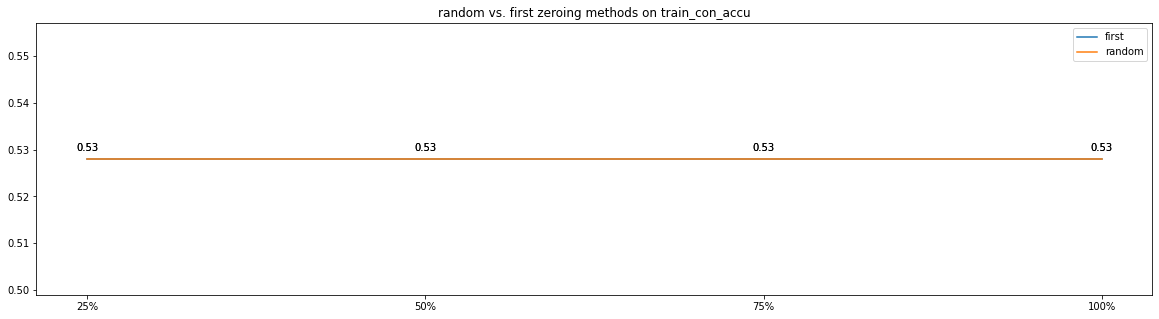

Pearson correction coeffificent: nan
p-value: nan


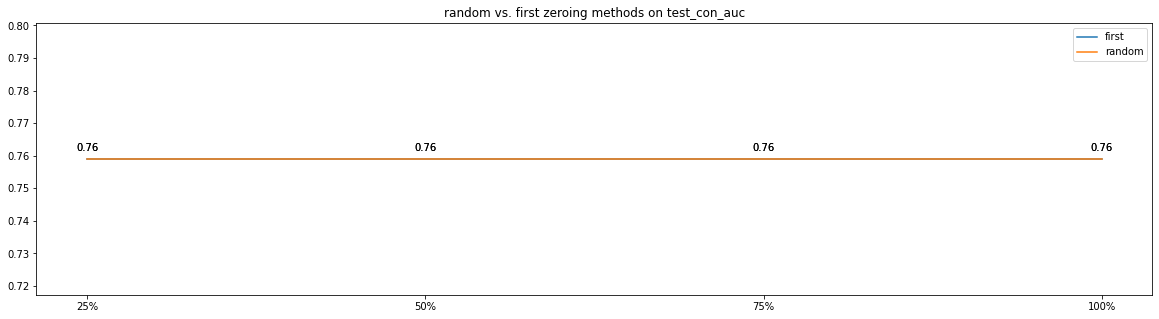

Pearson correction coeffificent: nan
p-value: nan


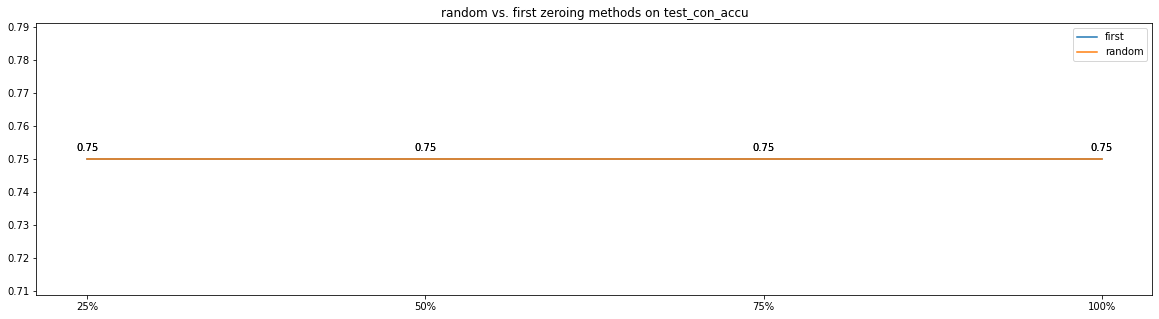

Pearson correction coeffificent: -0.495
p-value: 0.505


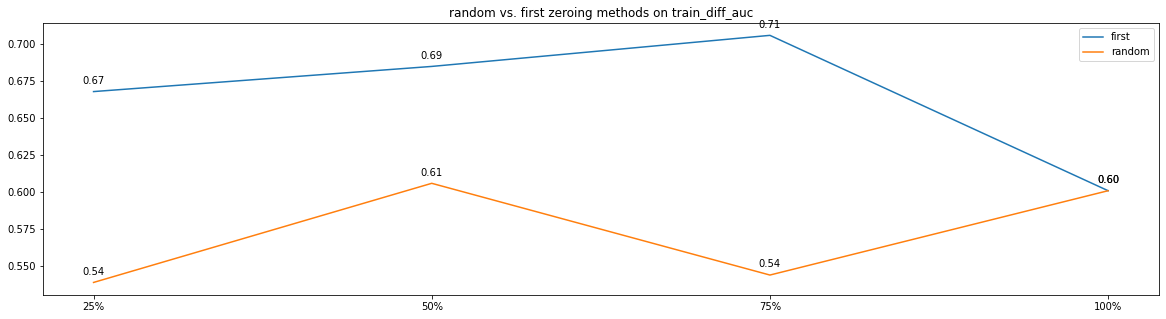

Pearson correction coeffificent: -0.041
p-value: 0.959


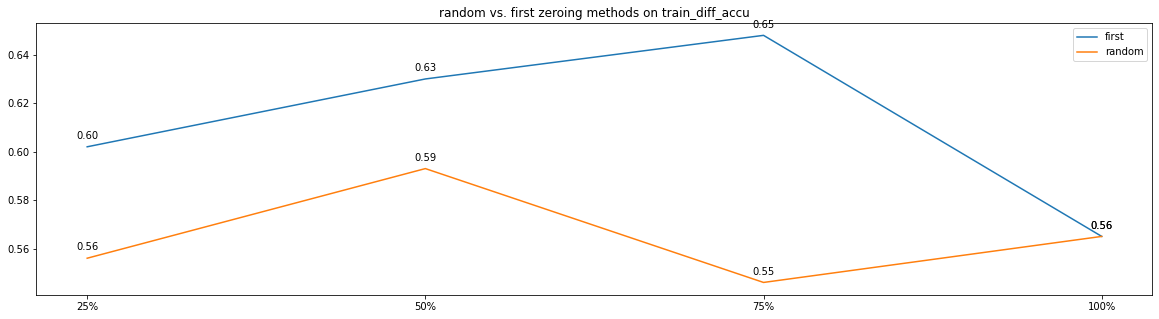

Pearson correction coeffificent: 0.468
p-value: 0.532


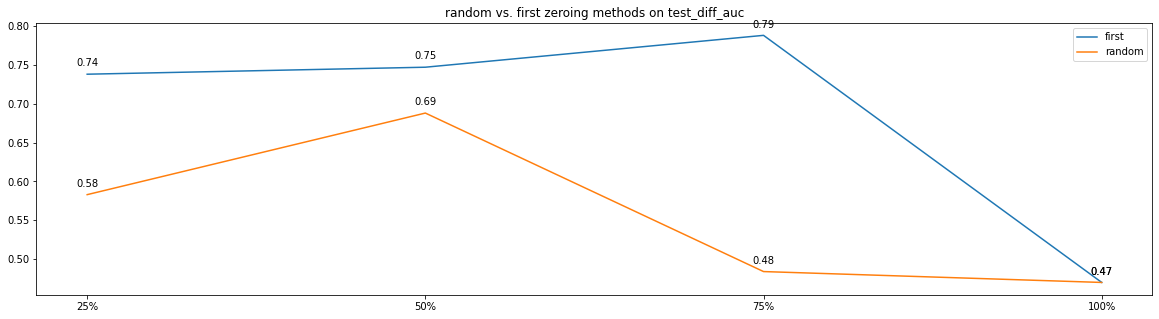

Pearson correction coeffificent: 0.354
p-value: 0.646


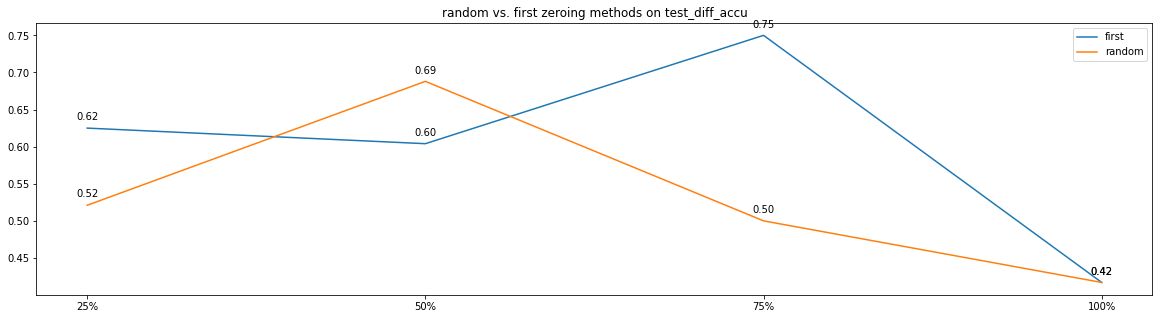

Pearson correction coeffificent: 0.381
p-value: 0.619


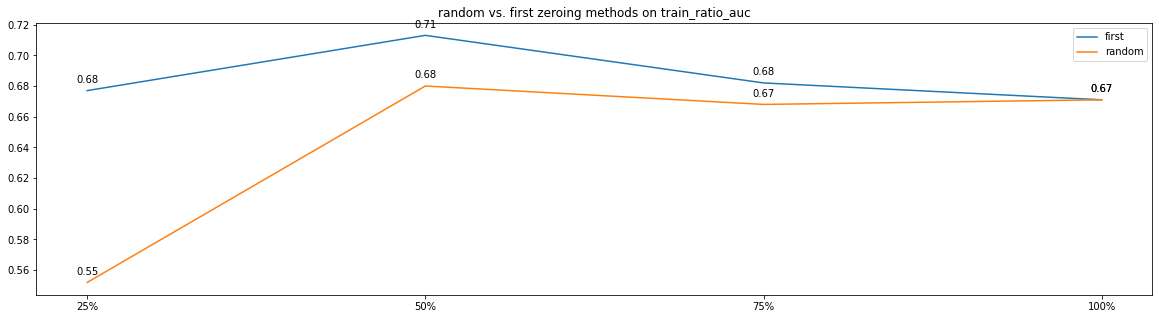

Pearson correction coeffificent: 0.502
p-value: 0.498


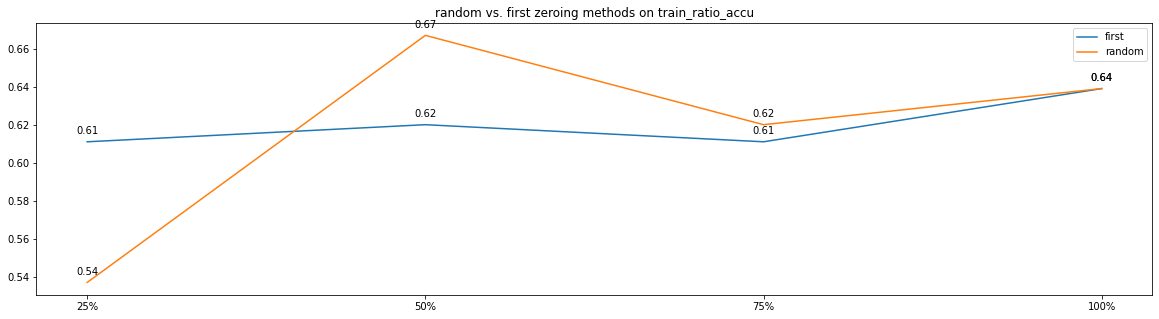

Pearson correction coeffificent: 0.471
p-value: 0.529


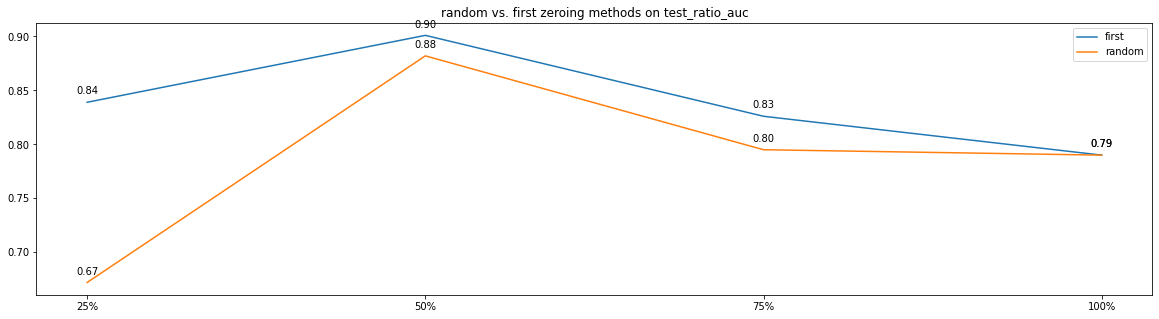

Pearson correction coeffificent: -0.124
p-value: 0.876


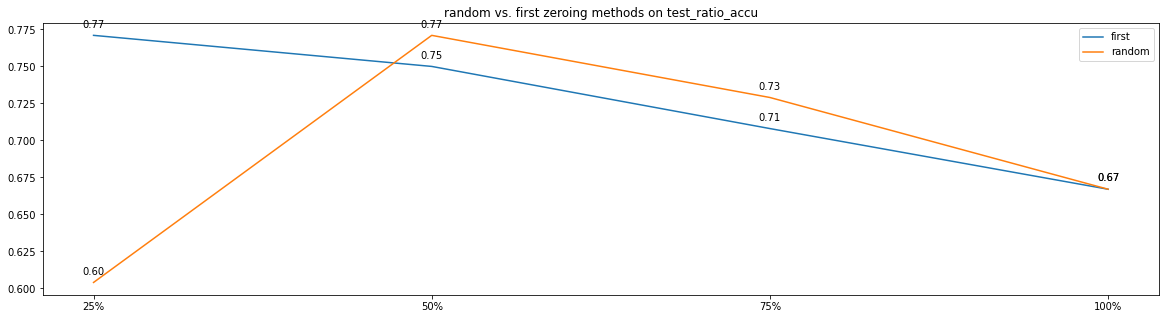

Pearson correction coeffificent: 0.381
p-value: 0.619


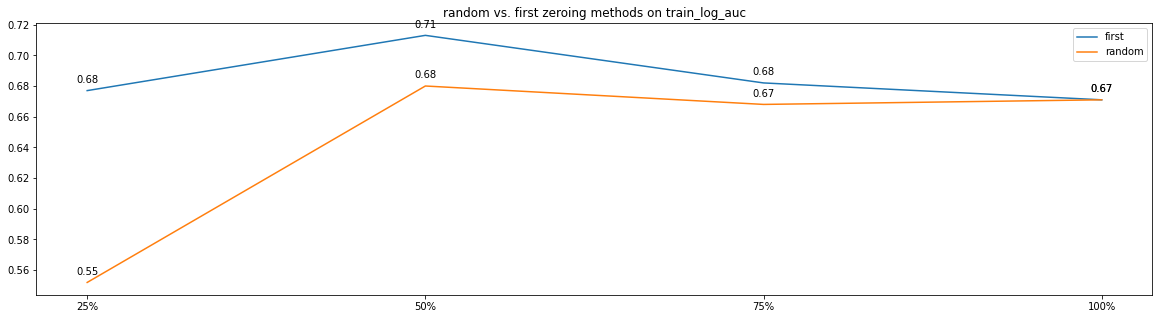

Pearson correction coeffificent: 0.502
p-value: 0.498


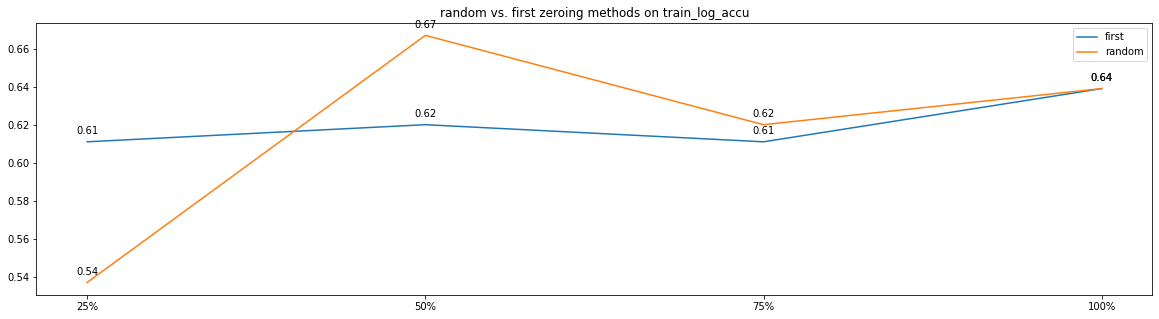

Pearson correction coeffificent: 0.471
p-value: 0.529


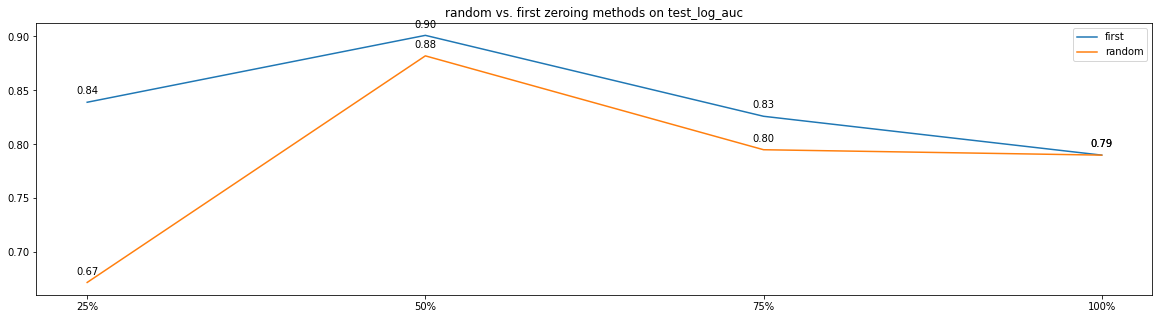

Pearson correction coeffificent: -0.124
p-value: 0.876


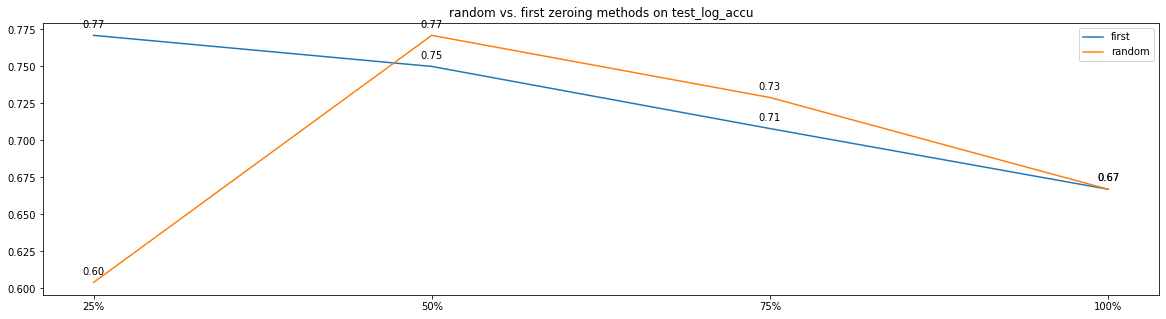

In [15]:
xasis = ["25%", "50%", "75%", "100%"]
for key in first_res_dict.keys():
    plt.plot(xasis, first_res_dict[key], label="first")
    plt.plot(xasis, random_res_dict[key], label="random")
    plt.legend()
    mark_values(xasis, first_res_dict[key])
    mark_values(xasis, random_res_dict[key])
    plt.title("random vs. first zeroing methods on {}".format(key))
    print("Pearson correction coeffificent: {}\np-value: {}".format(round(pearsonr(first_res_dict[key], random_res_dict[key])[0], 3),
                                                                    round(pearsonr(first_res_dict[key], random_res_dict[key])[1], 3)))
    plt.show()

## Accumulated Layers

### 25%

In [16]:
share = 25
data_type = "full"
def make_plot(share, data_type, xasis, hammer_style):
    first_res_dict = {"train_con_auc": [], "train_con_accu": [],
                      "test_con_auc": [], "test_con_accu": [],
                      "train_diff_auc": [], "train_diff_accu": [],
                      "test_diff_auc": [], "test_diff_accu": [],
                      "train_ratio_auc": [], "train_ratio_accu": [],
                      "test_ratio_auc": [], "test_ratio_accu": [],
                      "train_log_auc": [], "train_log_accu": [],
                      "test_log_auc": [], "test_log_accu": []}
    random_res_dict = {"train_con_auc": [], "train_con_accu": [],
                       "test_con_auc": [], "test_con_accu": [],
                       "train_diff_auc": [], "train_diff_accu": [],
                       "test_diff_auc": [], "test_diff_accu": [],
                       "train_ratio_auc": [], "train_ratio_accu": [],
                       "test_ratio_auc": [], "test_ratio_accu": [],
                       "train_log_auc": [], "train_log_accu": [],
                       "test_log_auc": [], "test_log_accu": []}
    first_file = "../evals/{}_first_{}_{}.pkl".format(hammer_style, share, data_type)
    random_file = "../evals/{}_random_{}_{}.pkl".format(hammer_style, share, data_type)
    with open(first_file, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            first_res_dict[key].extend(res_dict[key])
    with open(random_file, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            random_res_dict[key].extend(res_dict[key])
    for key in first_res_dict.keys():
        plt.plot(xasis, first_res_dict[key], label="first")
        plt.plot(xasis, random_res_dict[key], label="random")
        plt.xticks(np.arange(min(xasis), max(xasis), 1.0))
        plt.legend()
        mark_values(xasis, first_res_dict[key])
        mark_values(xasis, random_res_dict[key])
        plt.title("random vs. first zeroing methods on {}".format(key))
        print("Pearson correction coeffificent: {}\np-value: {}".format(round(pearsonr(first_res_dict[key], random_res_dict[key])[0], 3),
                                                                        round(pearsonr(first_res_dict[key], random_res_dict[key])[1], 3)))
        plt.show()

Pearson correction coeffificent: nan
p-value: nan


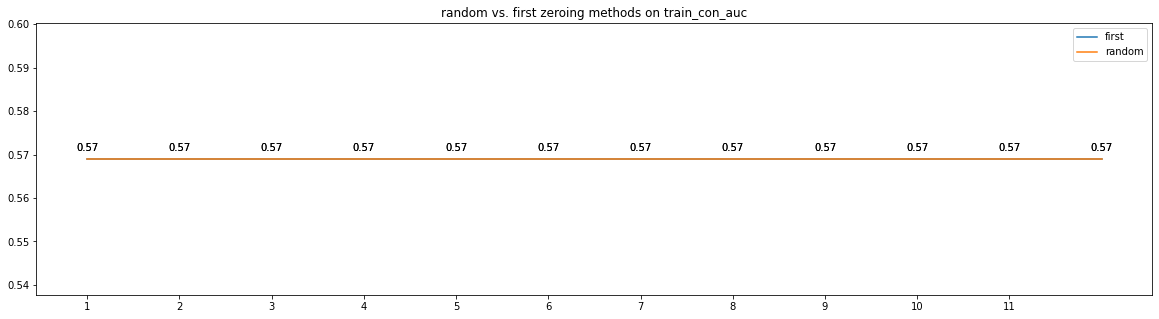

Pearson correction coeffificent: nan
p-value: nan


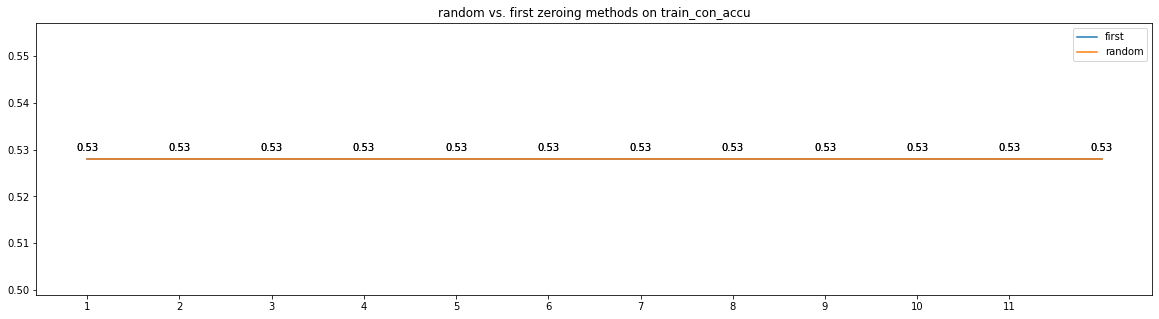

Pearson correction coeffificent: nan
p-value: nan


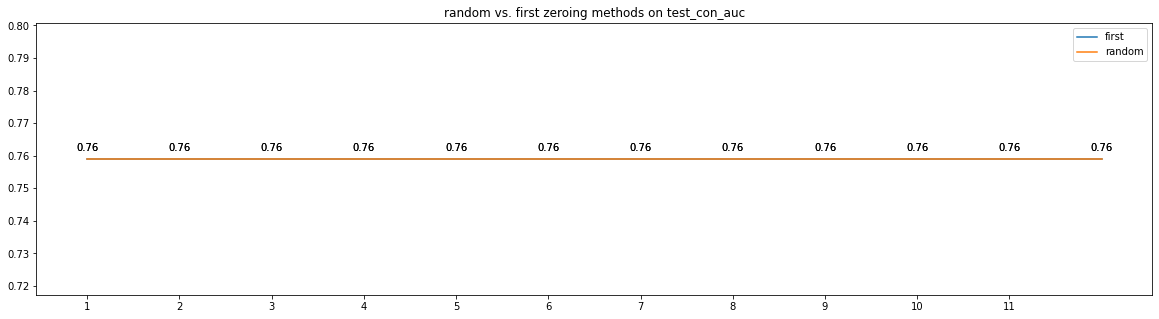

Pearson correction coeffificent: nan
p-value: nan


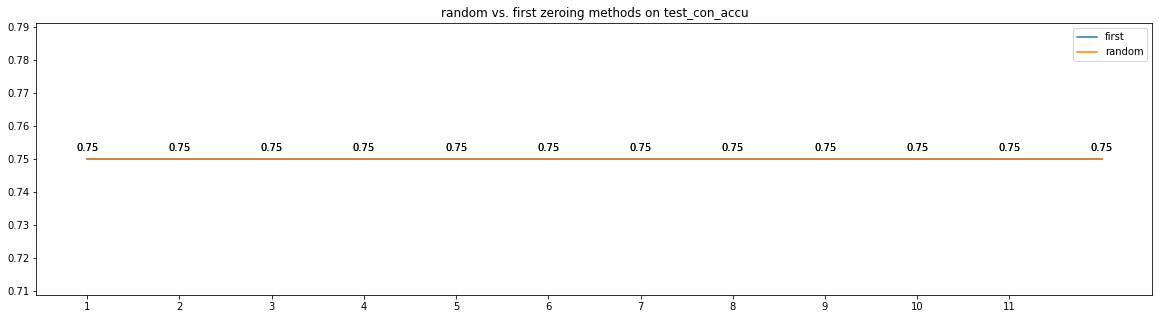

Pearson correction coeffificent: 0.873
p-value: 0.0


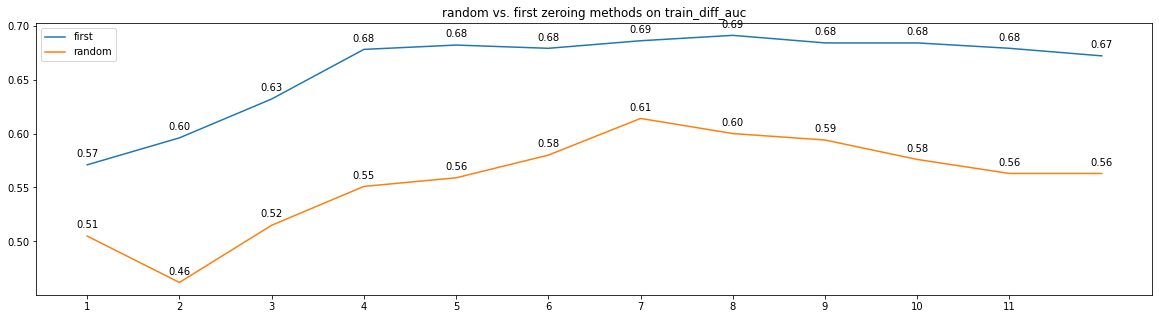

Pearson correction coeffificent: 0.761
p-value: 0.004


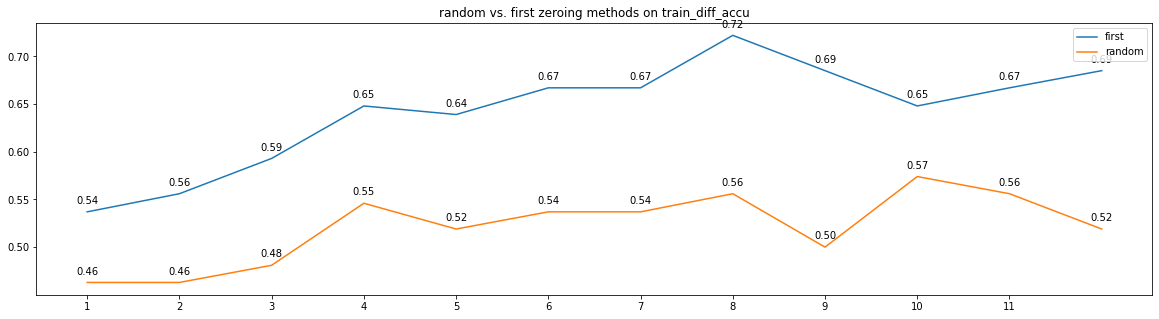

Pearson correction coeffificent: -0.335
p-value: 0.287


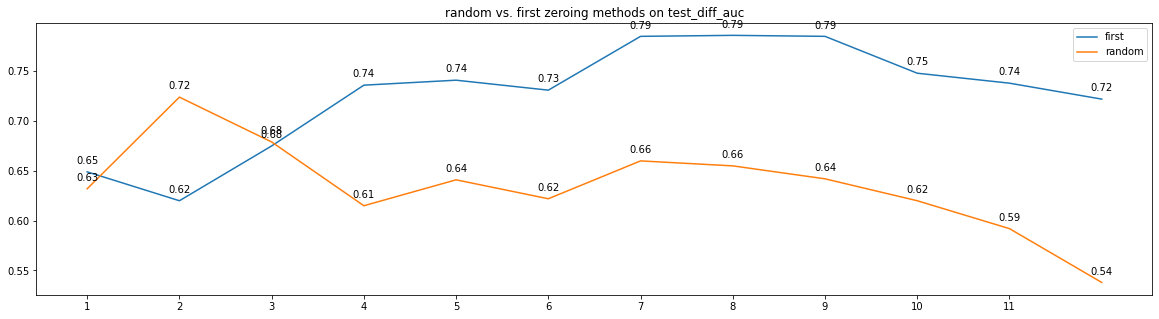

Pearson correction coeffificent: -0.154
p-value: 0.634


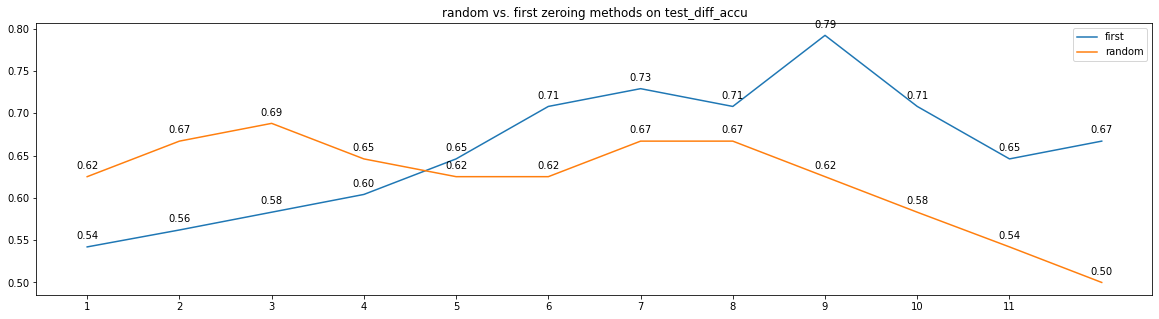

Pearson correction coeffificent: 0.96
p-value: 0.0


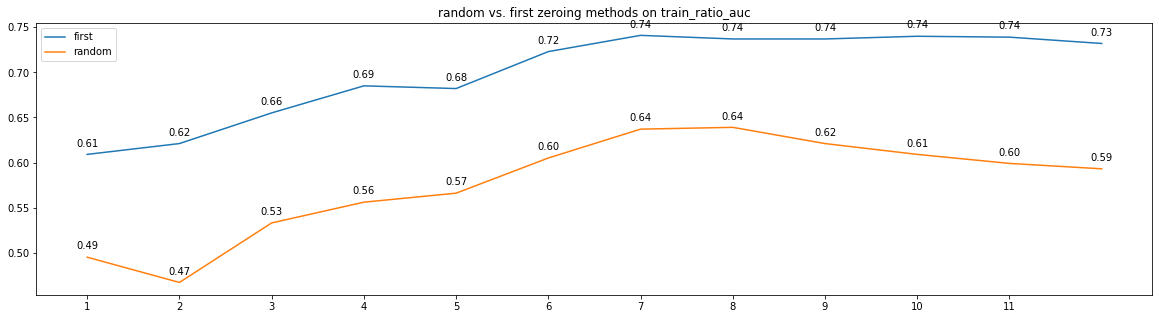

Pearson correction coeffificent: 0.757
p-value: 0.004


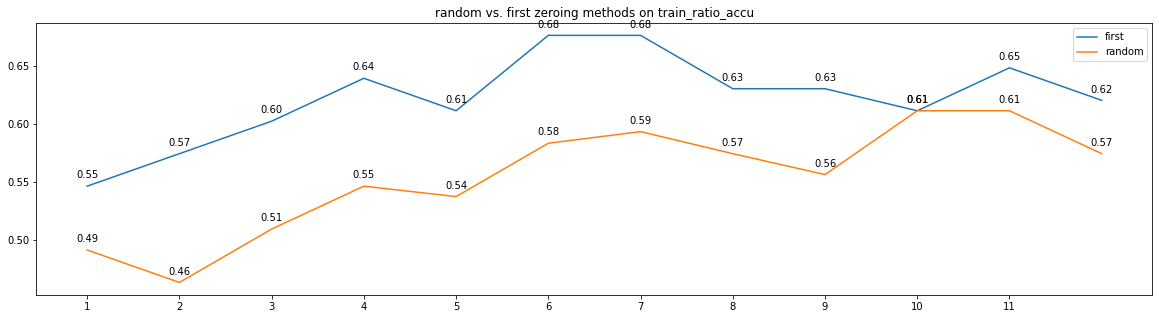

Pearson correction coeffificent: 0.827
p-value: 0.001


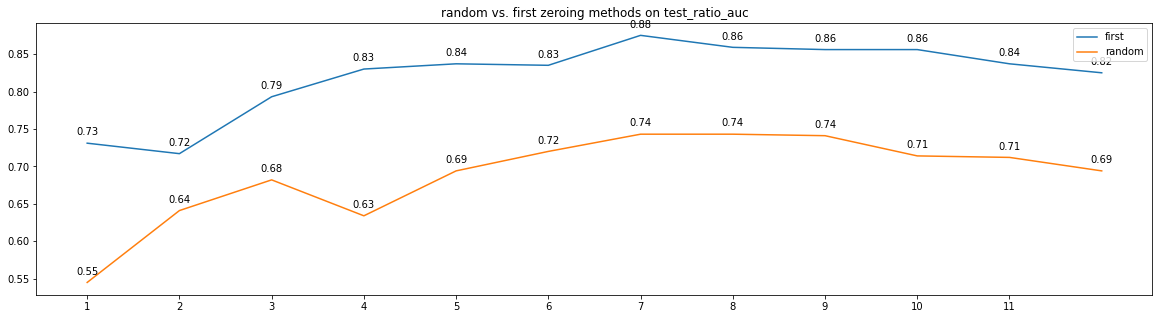

Pearson correction coeffificent: 0.625
p-value: 0.03


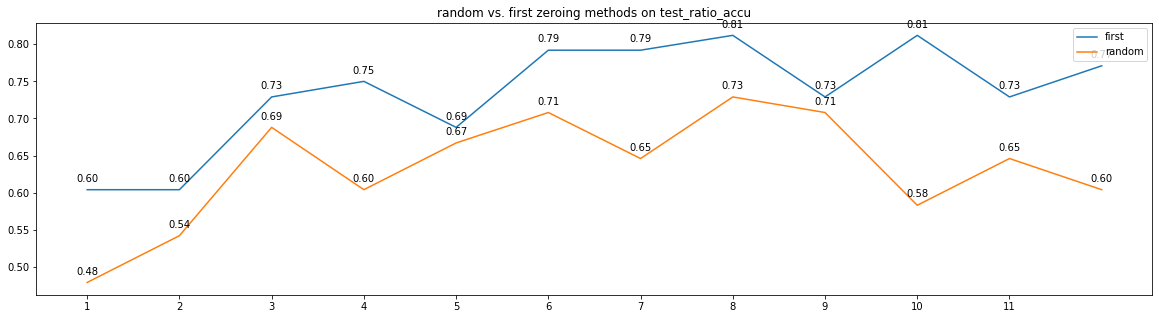

Pearson correction coeffificent: 0.96
p-value: 0.0


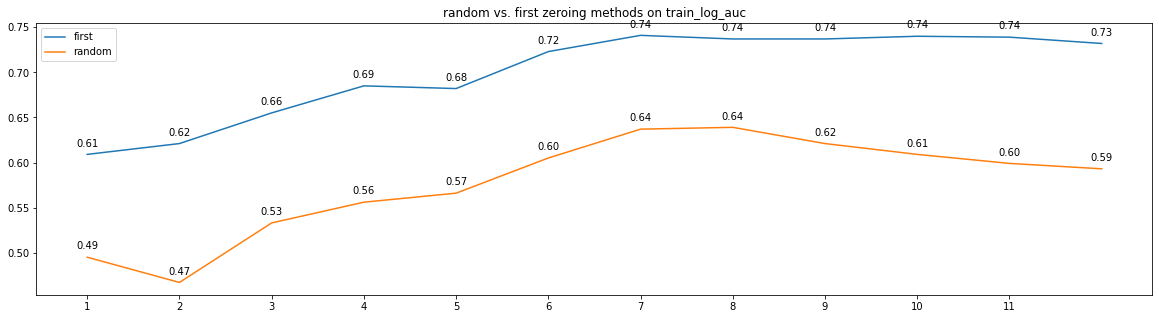

Pearson correction coeffificent: 0.757
p-value: 0.004


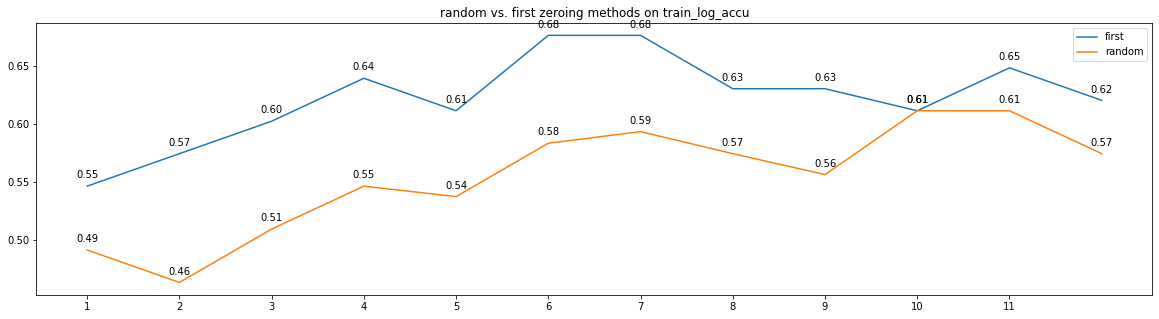

Pearson correction coeffificent: 0.827
p-value: 0.001


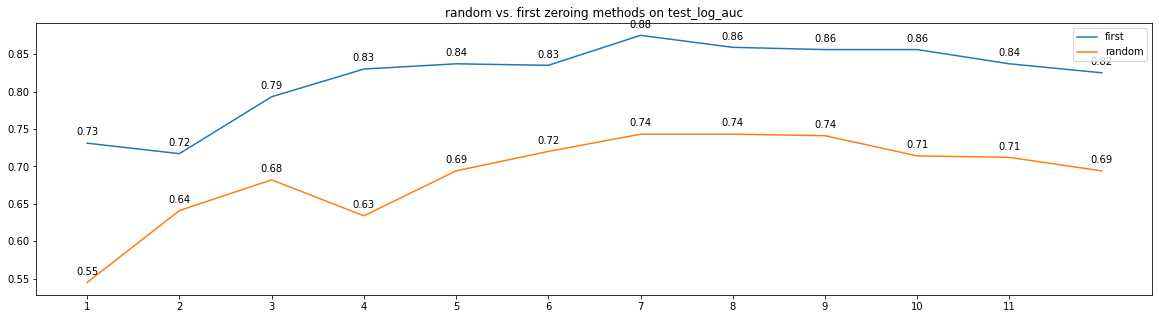

Pearson correction coeffificent: 0.625
p-value: 0.03


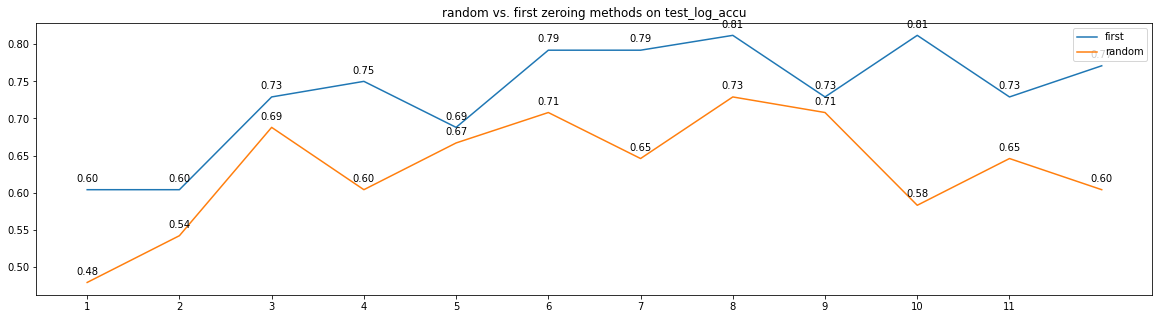

In [17]:
xasis = list(range(1, 13))
make_plot(25, "full", xasis, "accumu")

### 50%

Pearson correction coeffificent: nan
p-value: nan


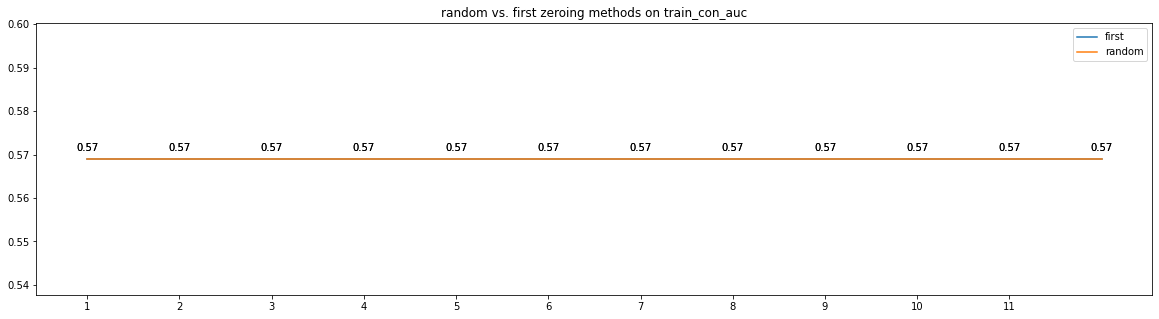

Pearson correction coeffificent: nan
p-value: nan


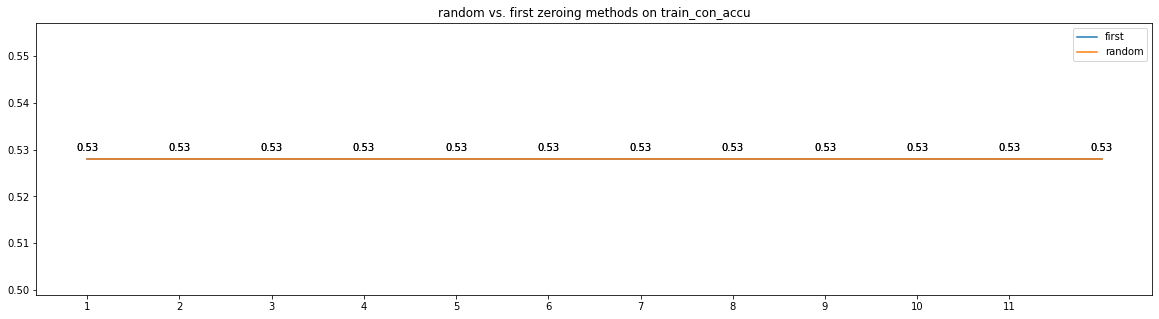

Pearson correction coeffificent: nan
p-value: nan


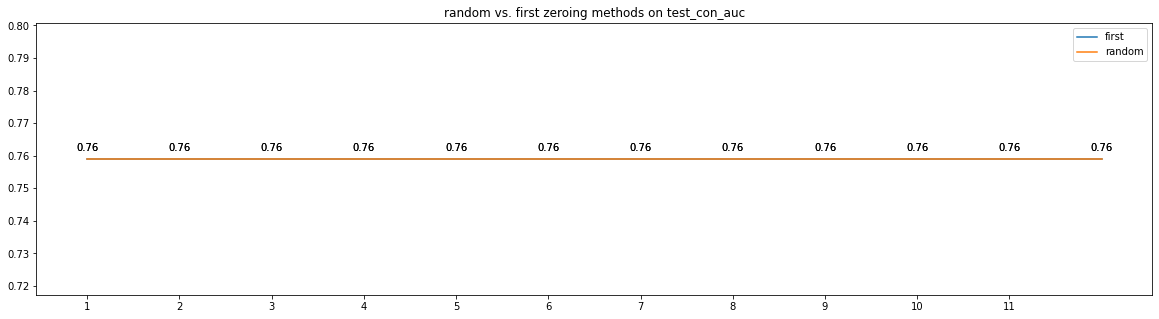

Pearson correction coeffificent: nan
p-value: nan


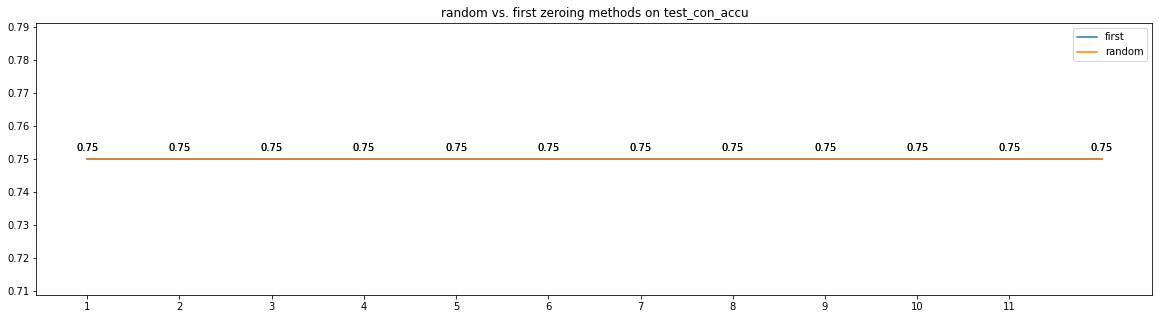

Pearson correction coeffificent: 0.861
p-value: 0.0


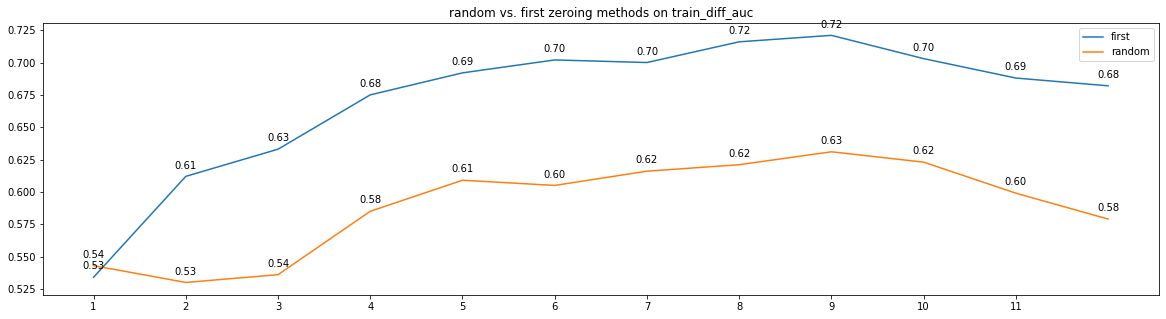

Pearson correction coeffificent: 0.274
p-value: 0.389


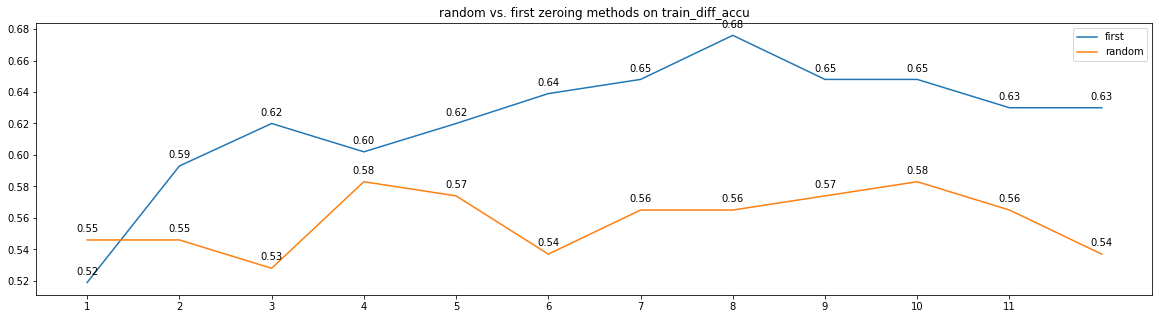

Pearson correction coeffificent: 0.333
p-value: 0.291


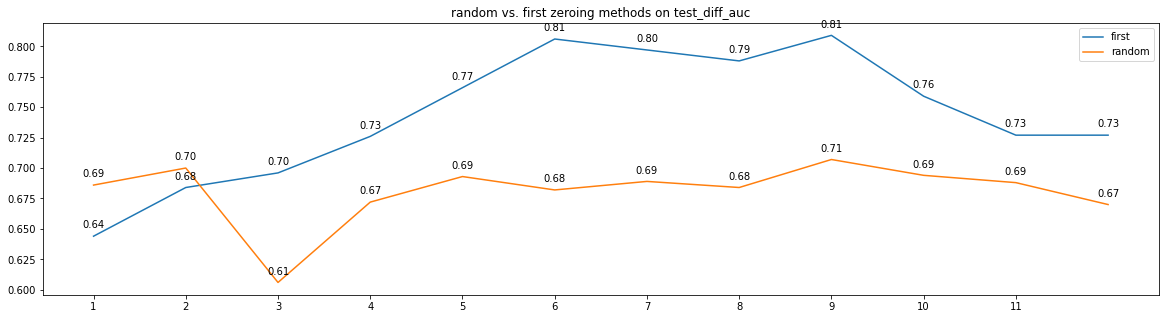

Pearson correction coeffificent: 0.304
p-value: 0.336


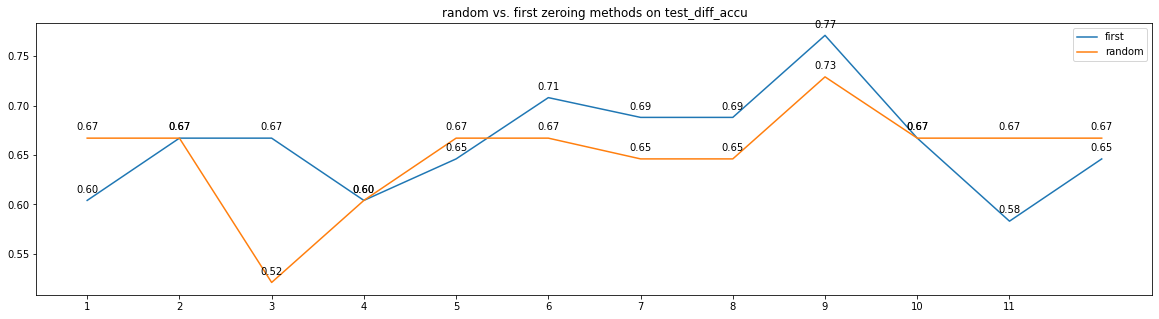

Pearson correction coeffificent: 0.856
p-value: 0.0


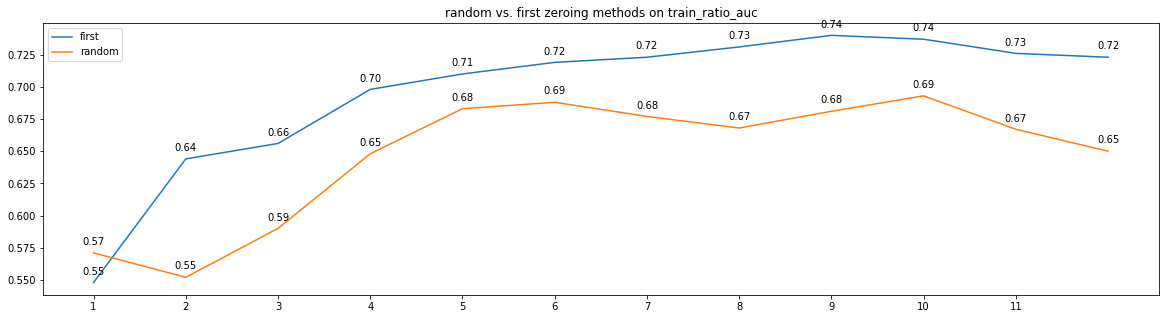

Pearson correction coeffificent: 0.777
p-value: 0.003


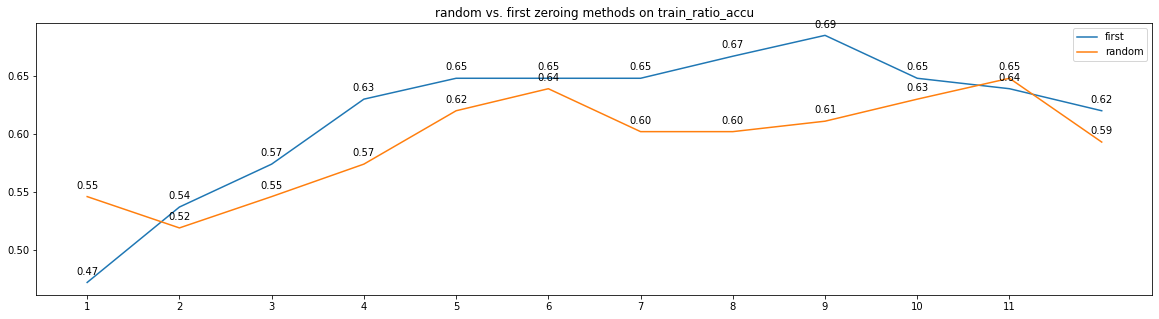

Pearson correction coeffificent: 0.943
p-value: 0.0


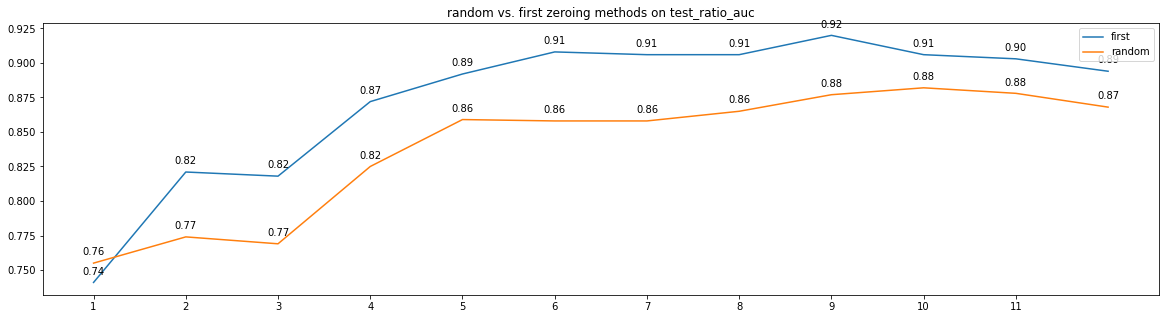

Pearson correction coeffificent: 0.474
p-value: 0.119


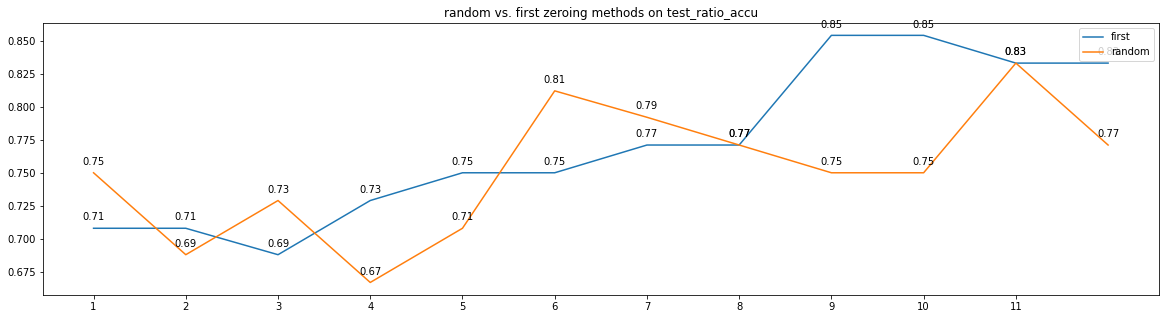

Pearson correction coeffificent: 0.856
p-value: 0.0


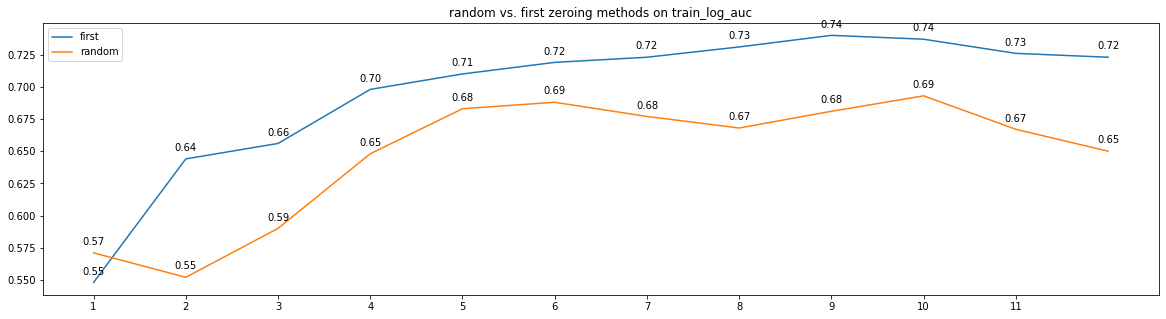

Pearson correction coeffificent: 0.777
p-value: 0.003


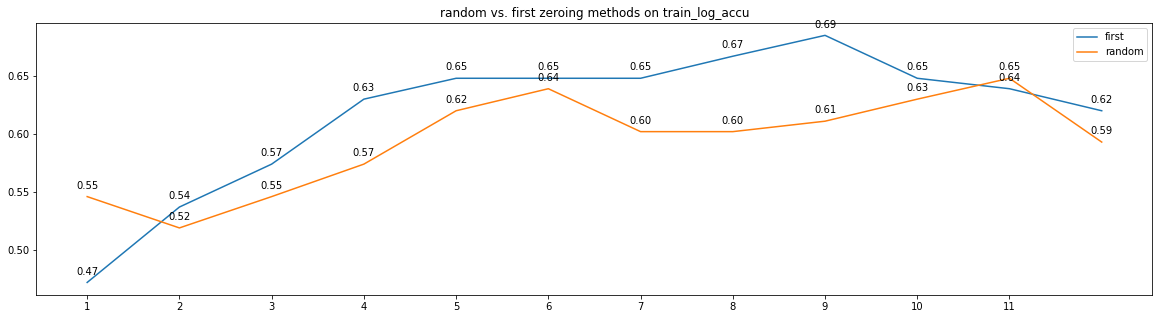

Pearson correction coeffificent: 0.943
p-value: 0.0


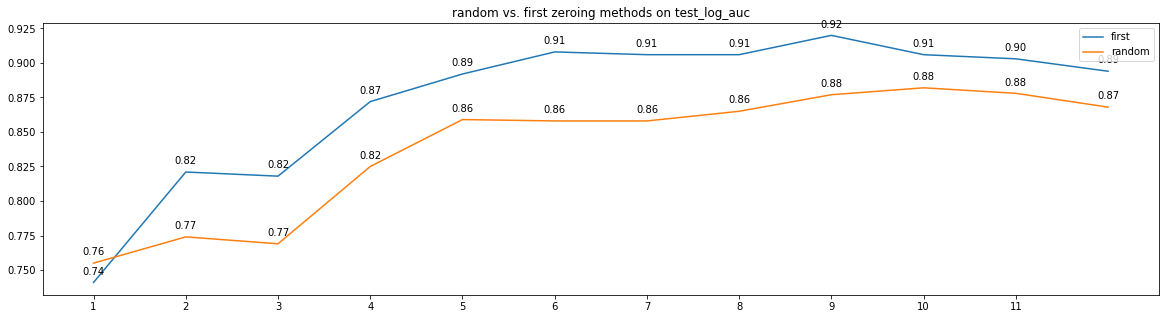

Pearson correction coeffificent: 0.474
p-value: 0.119


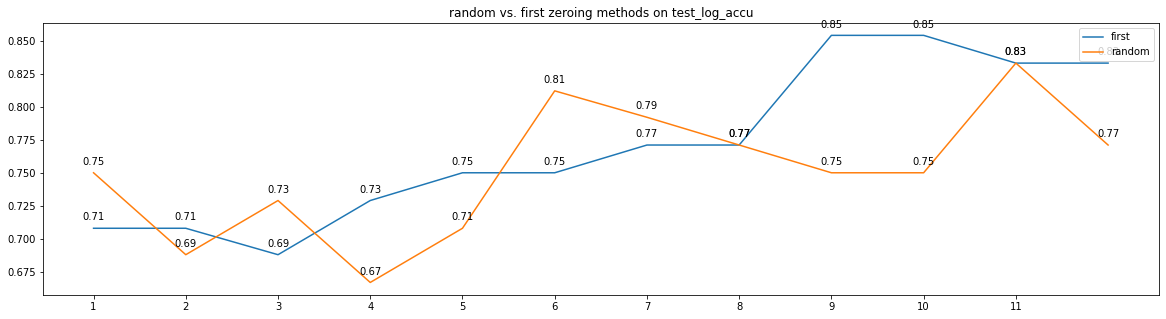

In [19]:
make_plot(50, "full", xasis, "accumu")

Pearson correction coeffificent: nan
p-value: nan


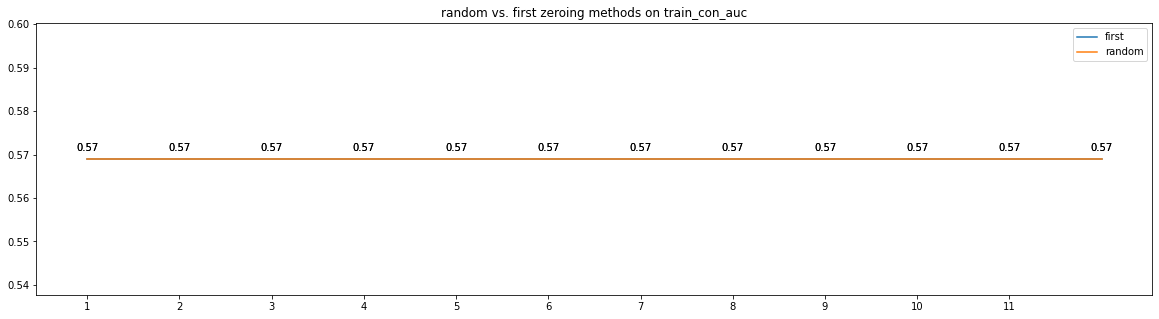

Pearson correction coeffificent: nan
p-value: nan


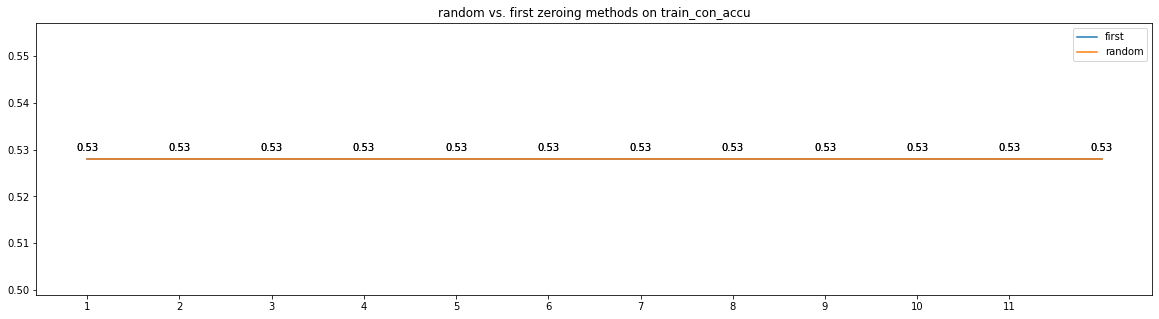

Pearson correction coeffificent: nan
p-value: nan


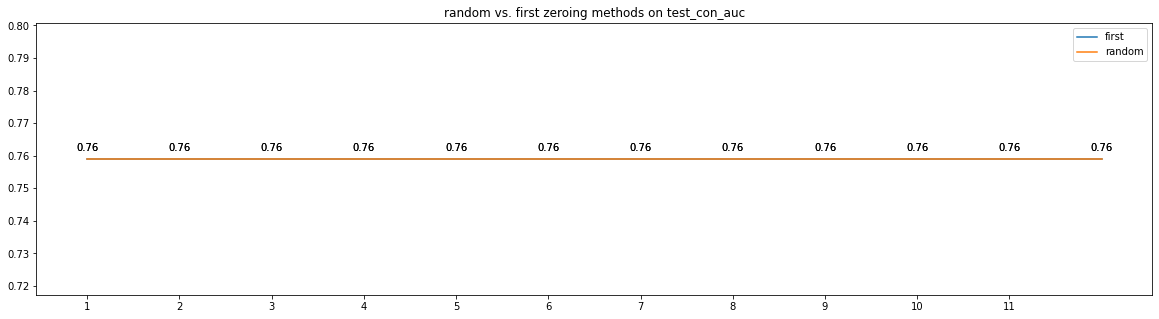

Pearson correction coeffificent: nan
p-value: nan


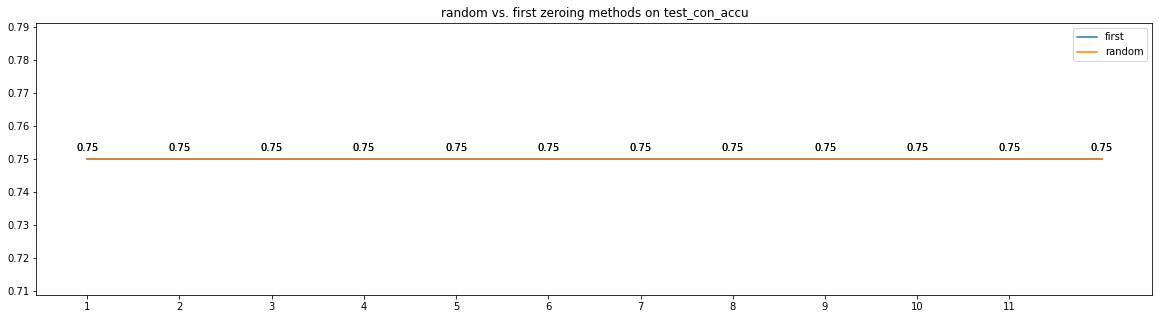

Pearson correction coeffificent: -0.069
p-value: 0.832


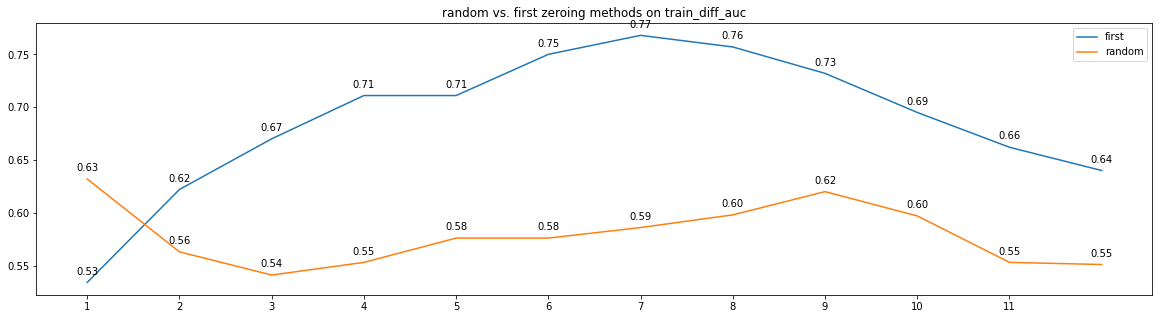

Pearson correction coeffificent: -0.374
p-value: 0.231


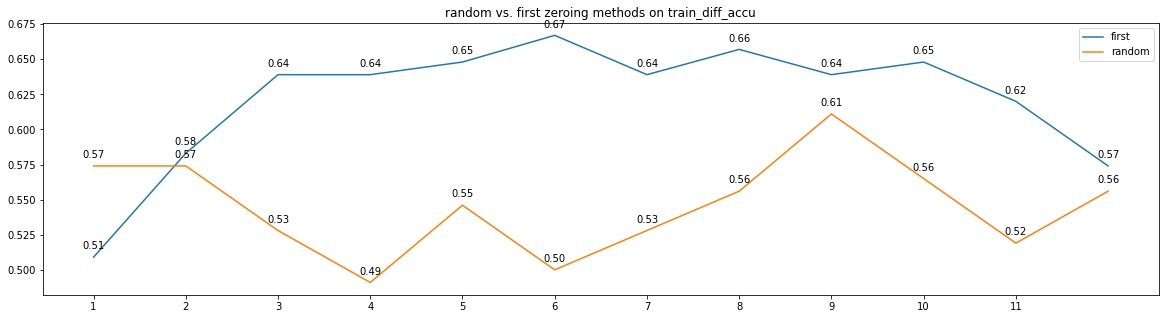

Pearson correction coeffificent: 0.419
p-value: 0.175


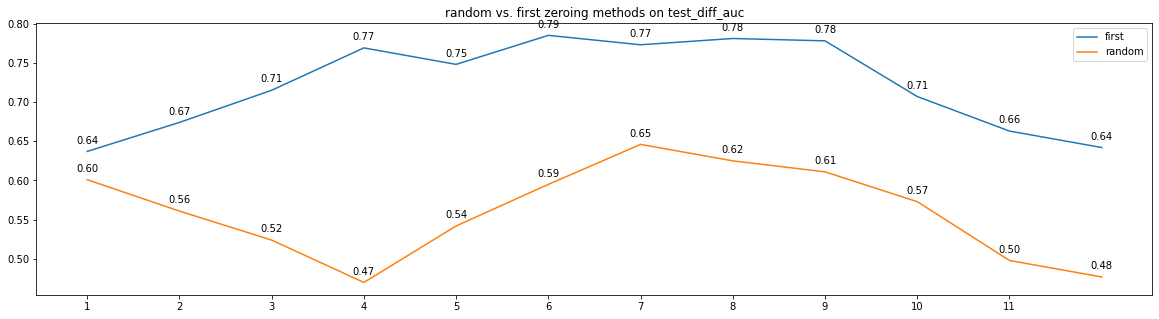

Pearson correction coeffificent: 0.45
p-value: 0.142


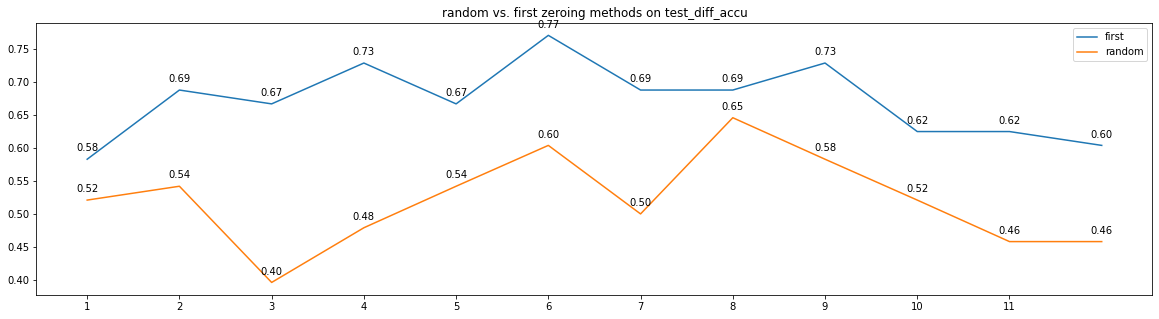

Pearson correction coeffificent: 0.456
p-value: 0.136


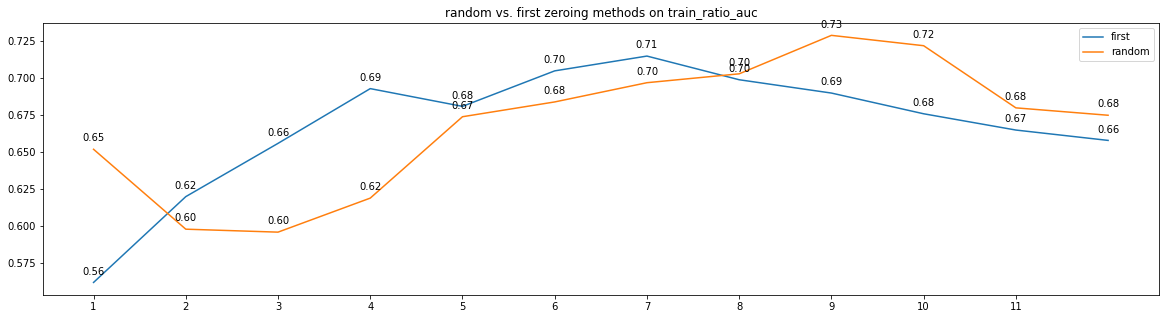

Pearson correction coeffificent: 0.218
p-value: 0.497


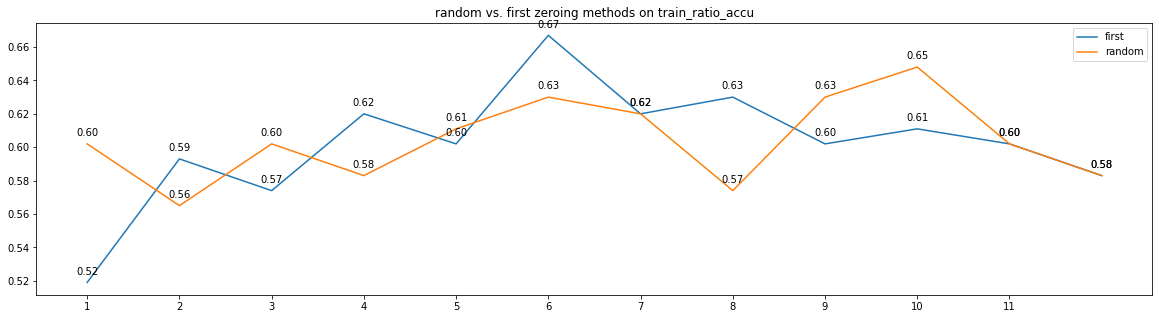

Pearson correction coeffificent: 0.517
p-value: 0.086


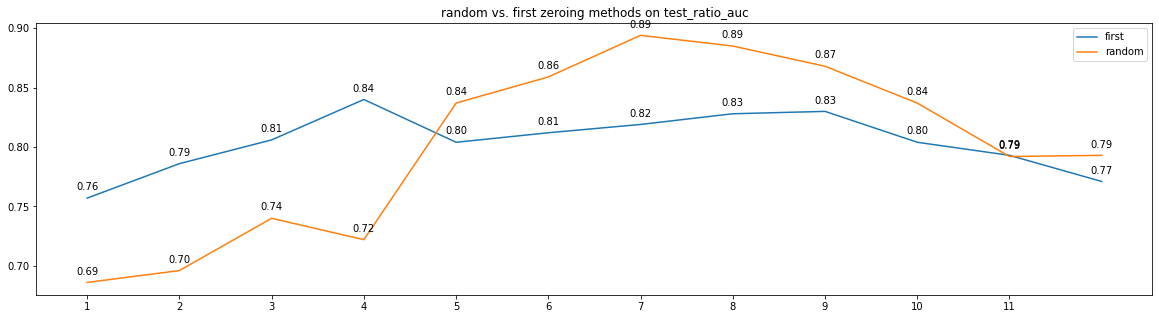

Pearson correction coeffificent: -0.253
p-value: 0.428


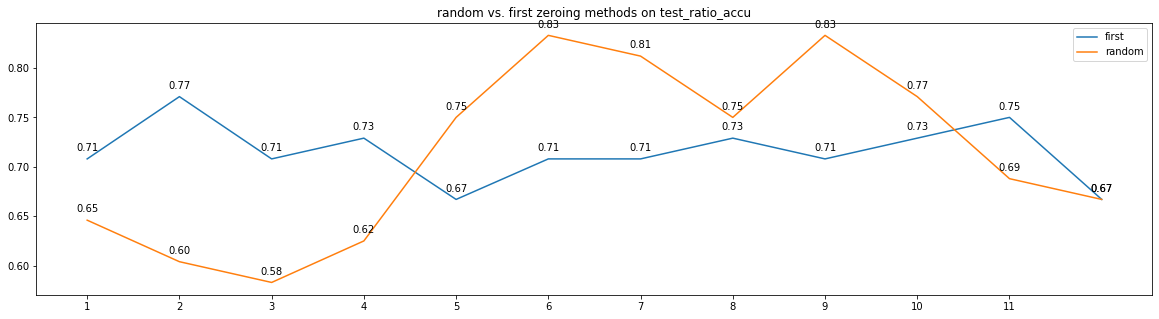

Pearson correction coeffificent: 0.456
p-value: 0.136


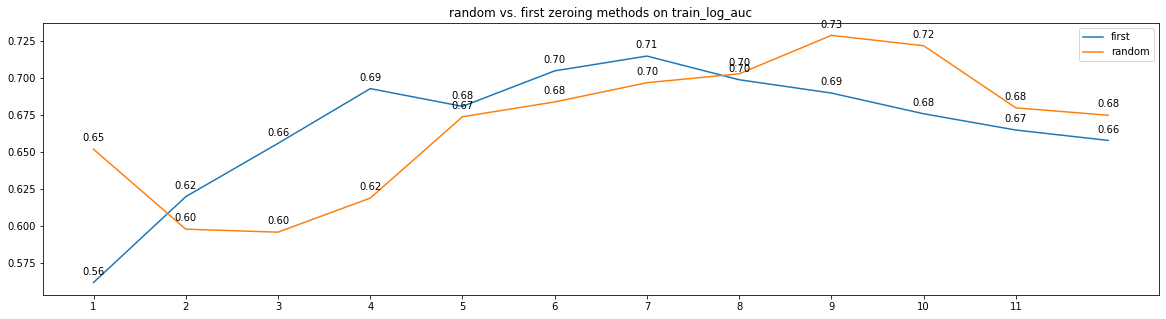

Pearson correction coeffificent: 0.218
p-value: 0.497


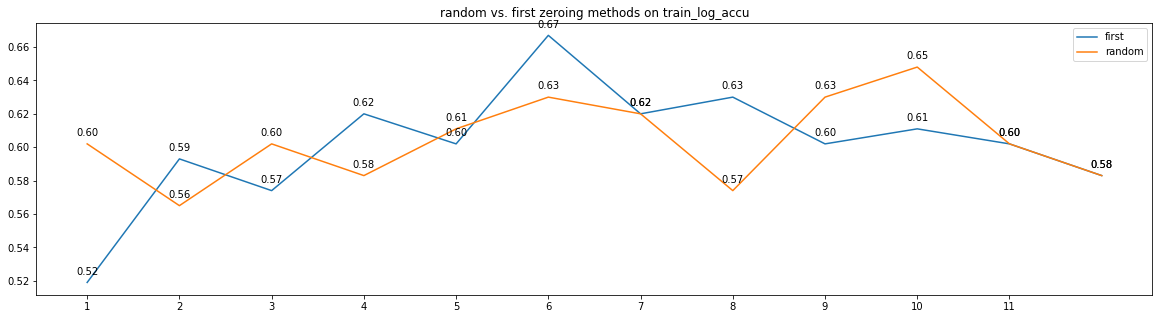

Pearson correction coeffificent: 0.517
p-value: 0.086


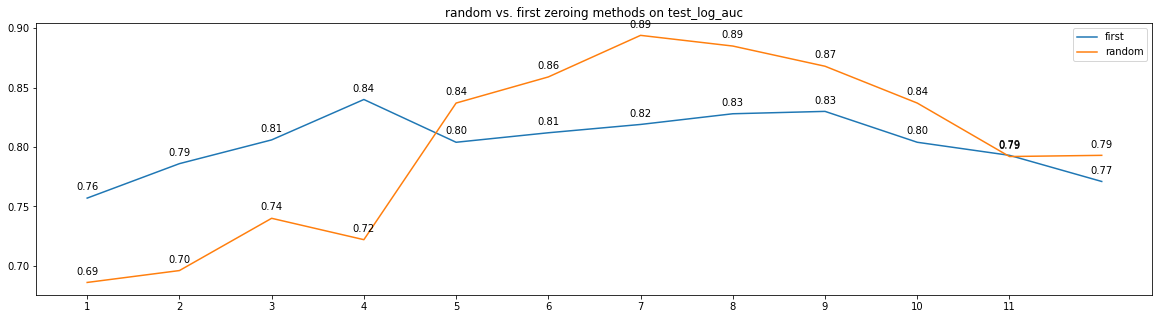

Pearson correction coeffificent: -0.253
p-value: 0.428


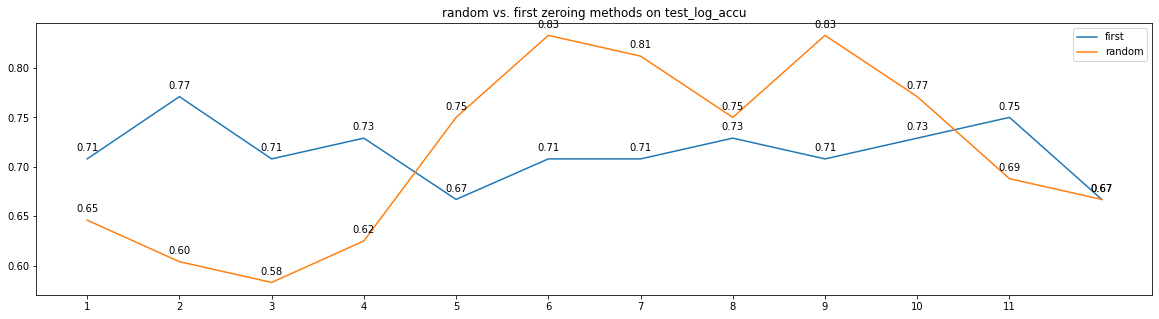

In [20]:
make_plot(75, "full", xasis, "accumu")

Pearson correction coeffificent: nan
p-value: nan


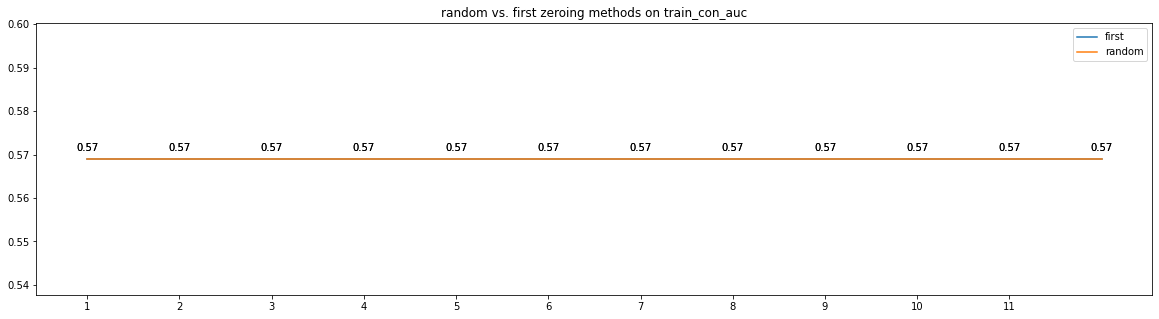

Pearson correction coeffificent: nan
p-value: nan


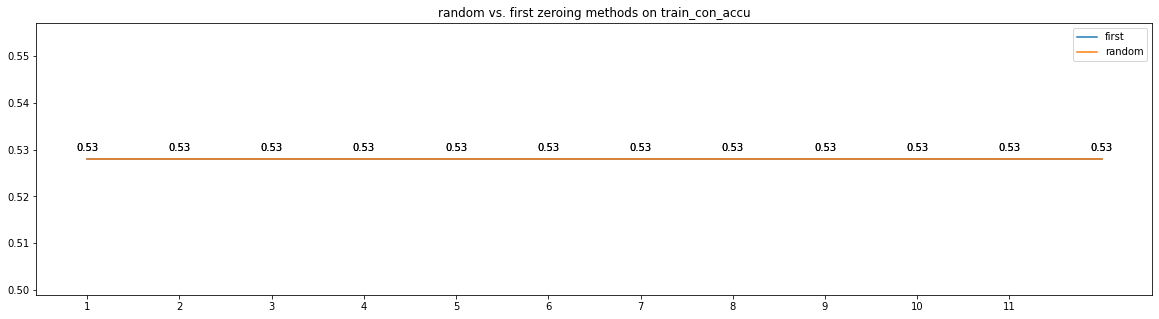

Pearson correction coeffificent: nan
p-value: nan


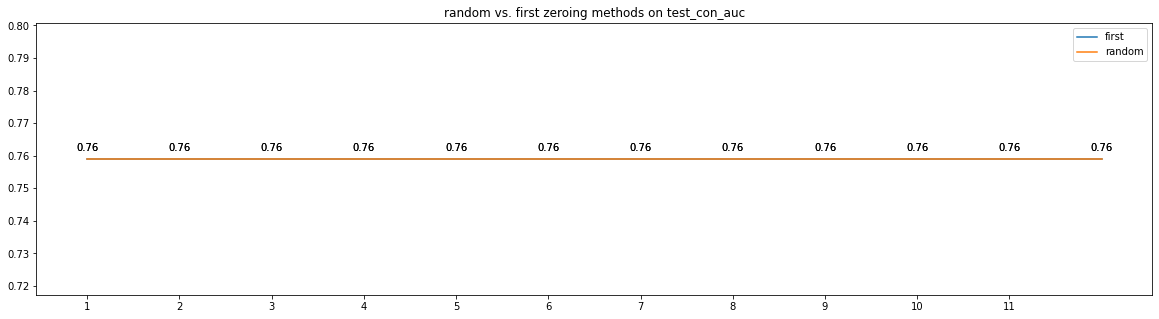

Pearson correction coeffificent: nan
p-value: nan


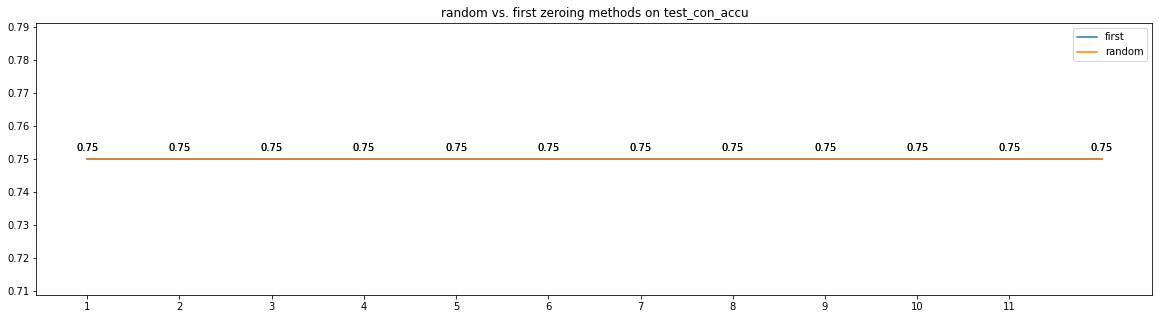

Pearson correction coeffificent: 1.0
p-value: 0.0


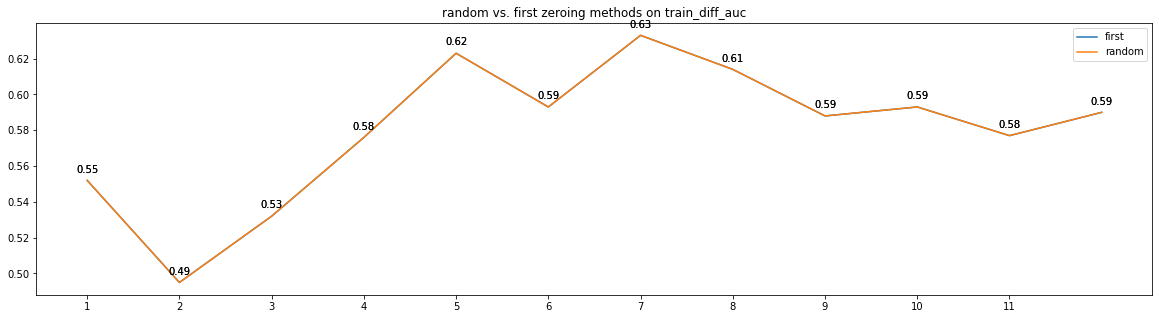

Pearson correction coeffificent: 1.0
p-value: 0.0


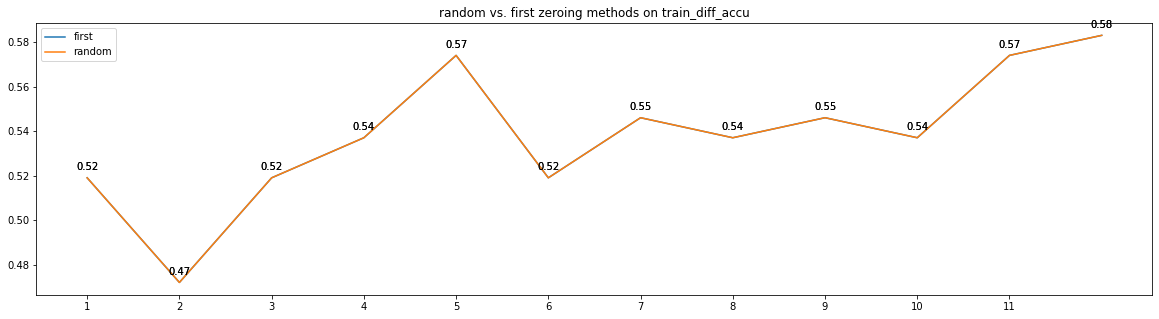

Pearson correction coeffificent: 1.0
p-value: 0.0


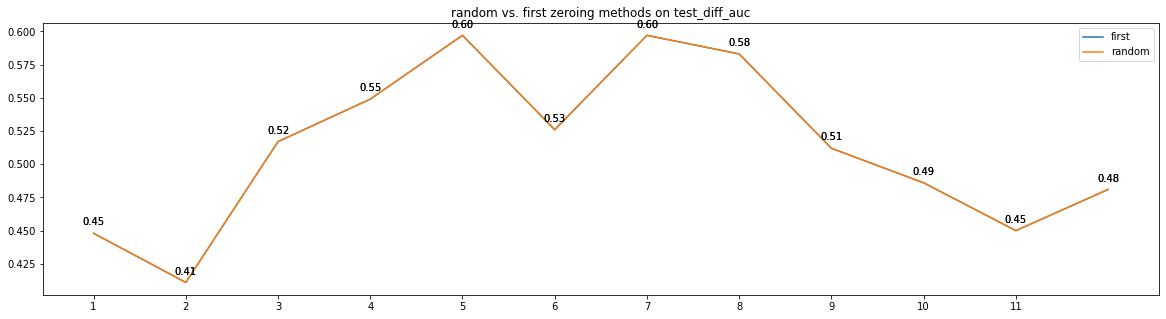

Pearson correction coeffificent: 1.0
p-value: 0.0


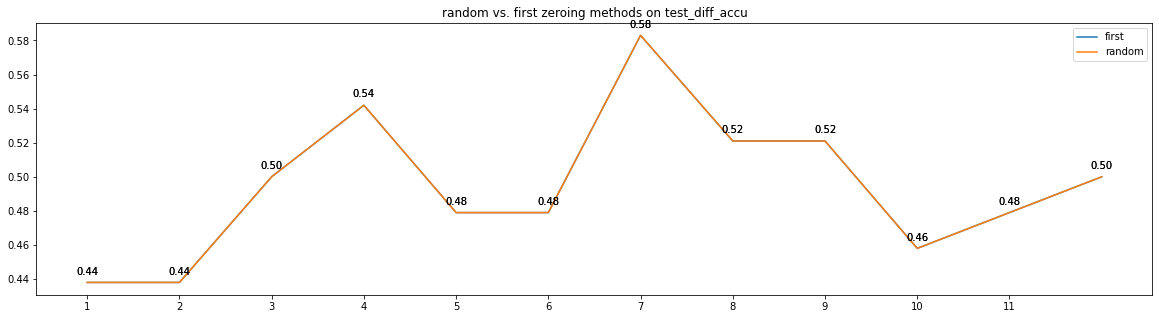

Pearson correction coeffificent: 1.0
p-value: 0.0


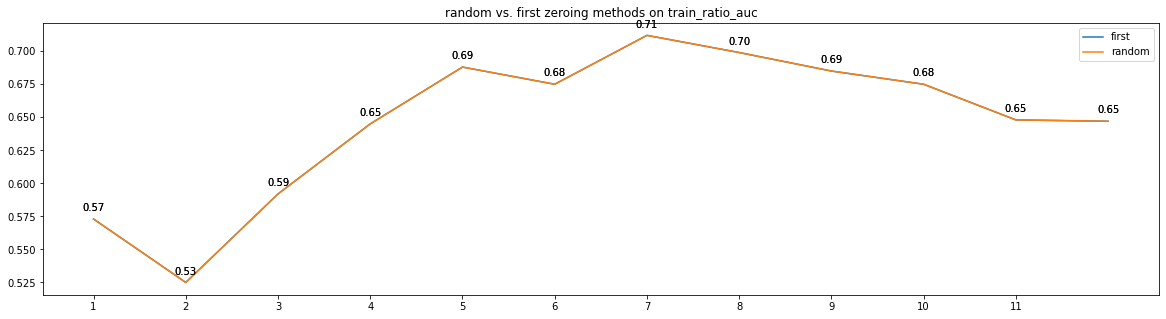

Pearson correction coeffificent: 1.0
p-value: 0.0


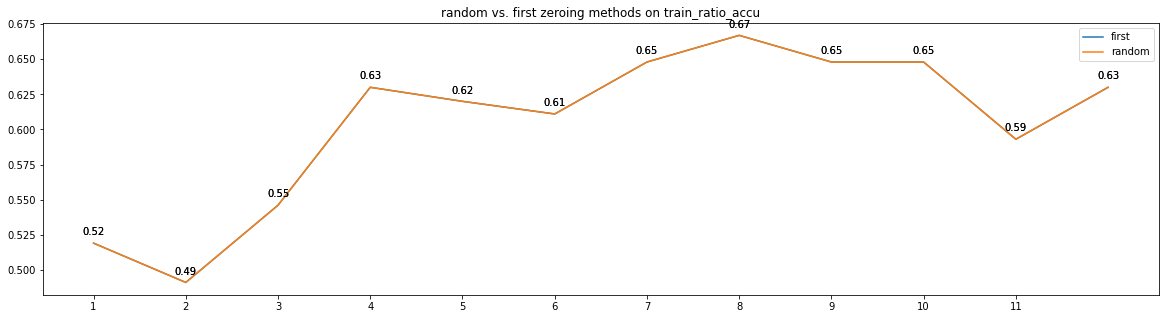

Pearson correction coeffificent: 1.0
p-value: 0.0


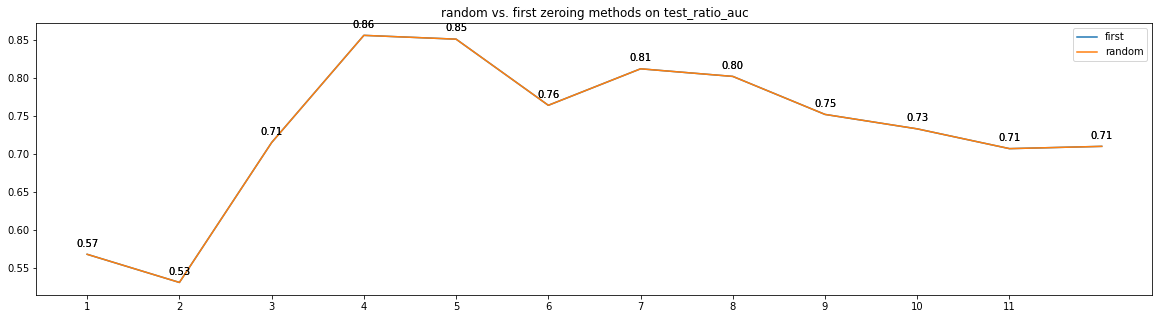

Pearson correction coeffificent: 1.0
p-value: 0.0


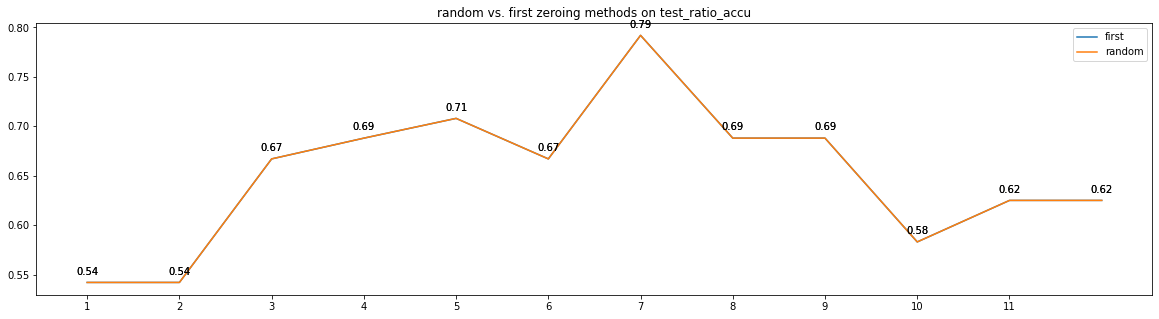

Pearson correction coeffificent: 1.0
p-value: 0.0


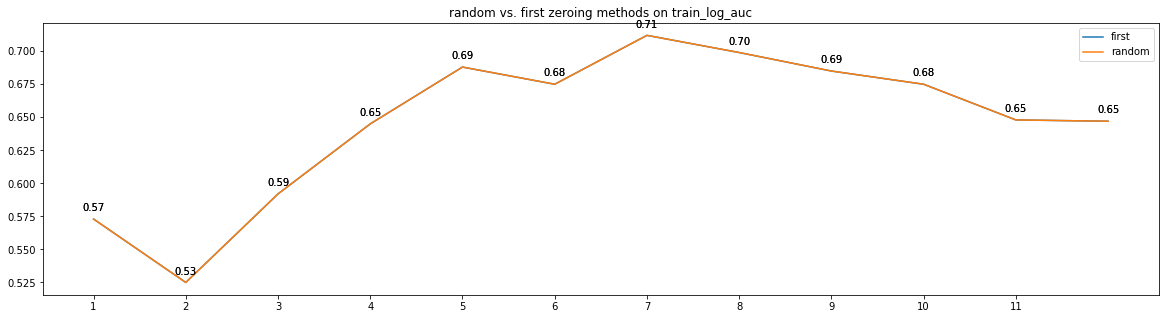

Pearson correction coeffificent: 1.0
p-value: 0.0


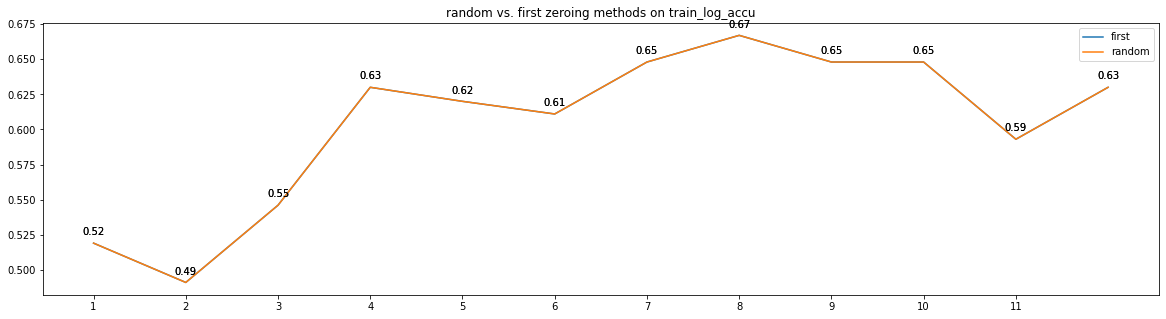

Pearson correction coeffificent: 1.0
p-value: 0.0


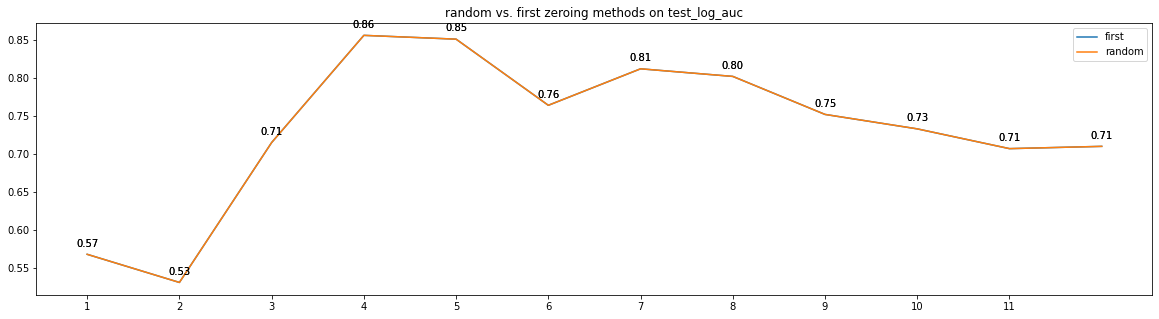

Pearson correction coeffificent: 1.0
p-value: 0.0


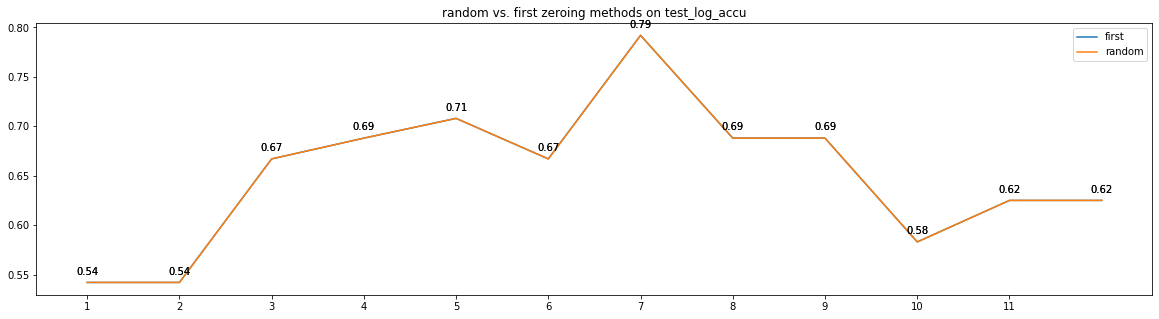

In [23]:
make_plot(100, "full", xasis, "accumu")

## Onetime Layers

### 25%

Pearson correction coeffificent: nan
p-value: nan


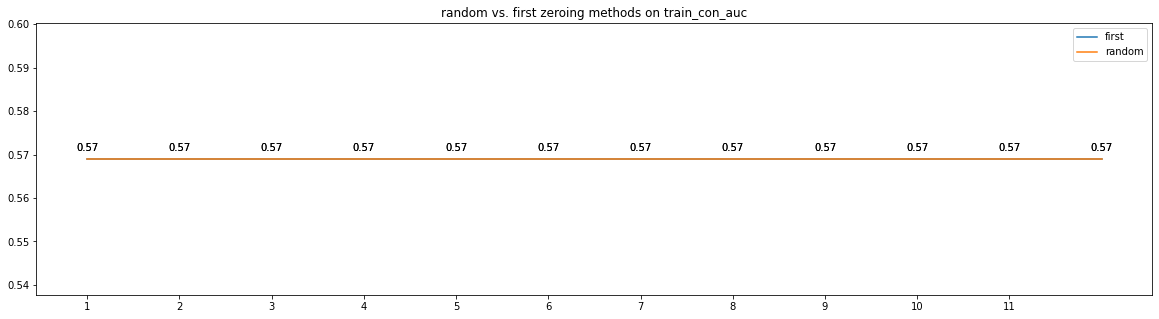

Pearson correction coeffificent: nan
p-value: nan


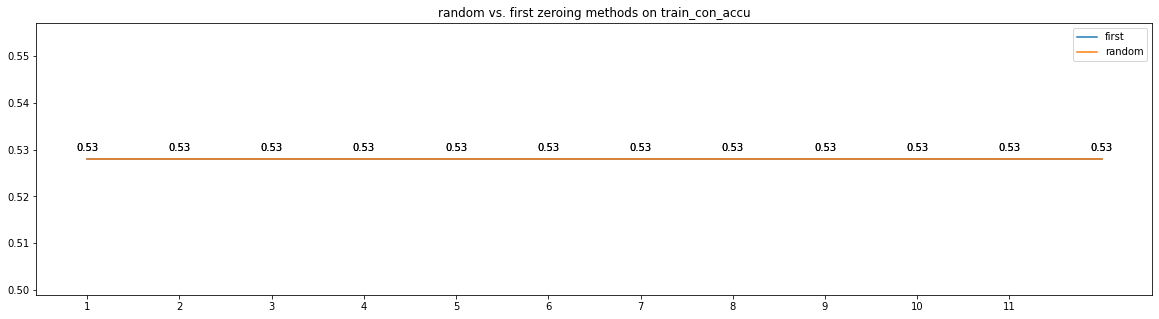

Pearson correction coeffificent: nan
p-value: nan


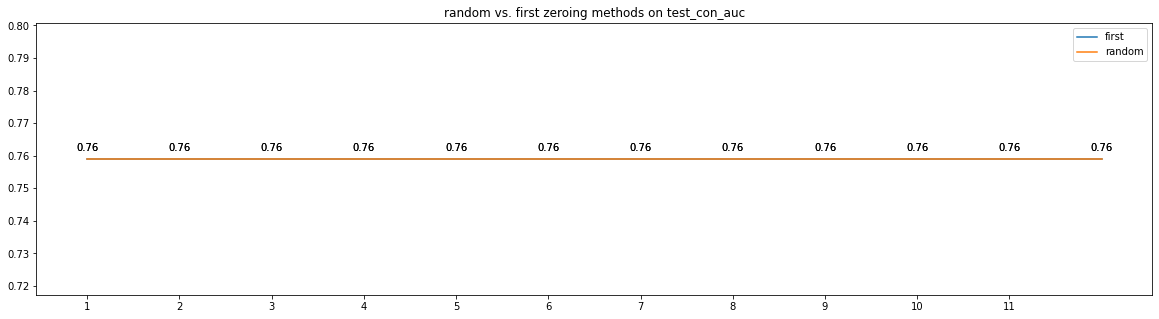

Pearson correction coeffificent: nan
p-value: nan


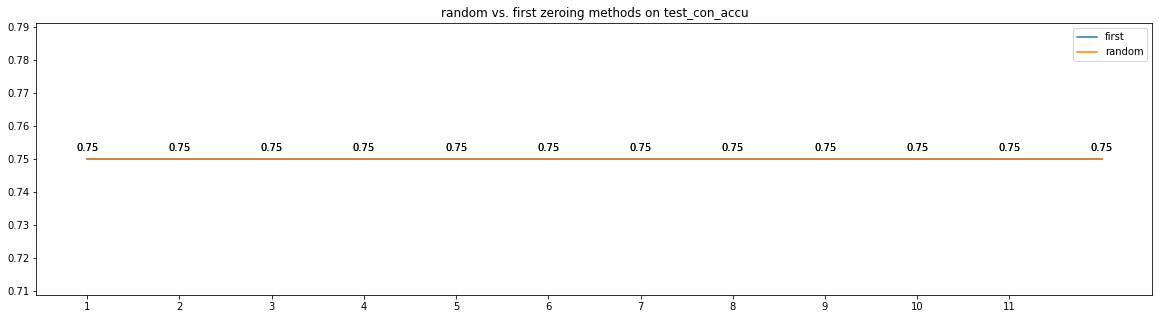

Pearson correction coeffificent: -0.072
p-value: 0.823


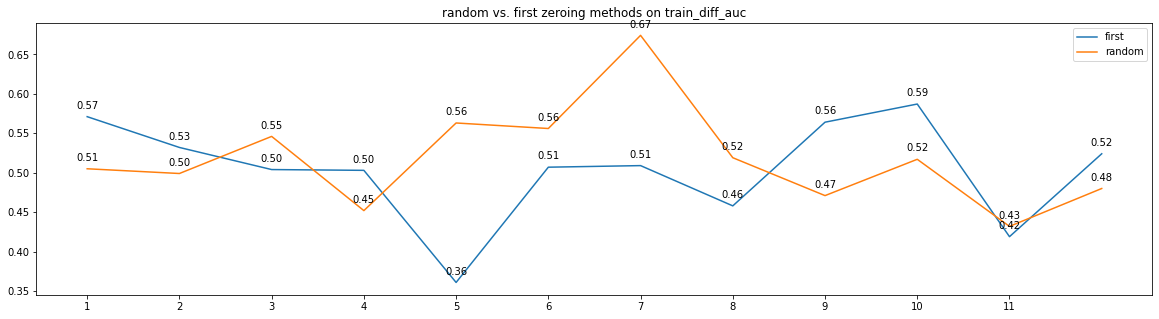

Pearson correction coeffificent: -0.494
p-value: 0.103


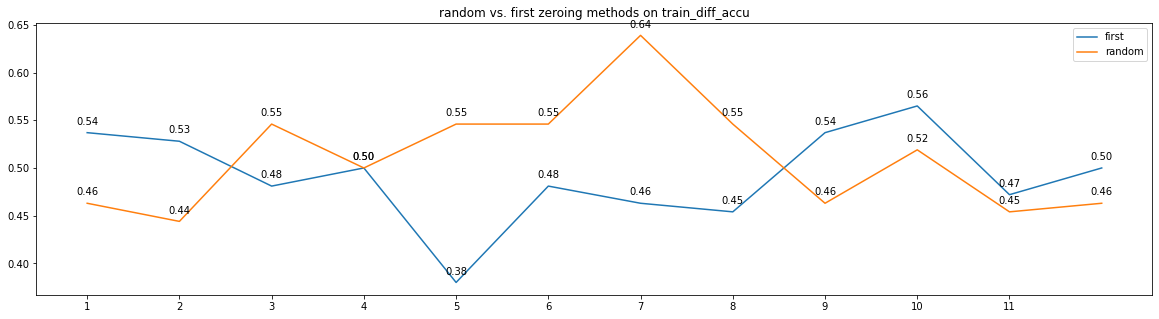

Pearson correction coeffificent: 0.372
p-value: 0.234


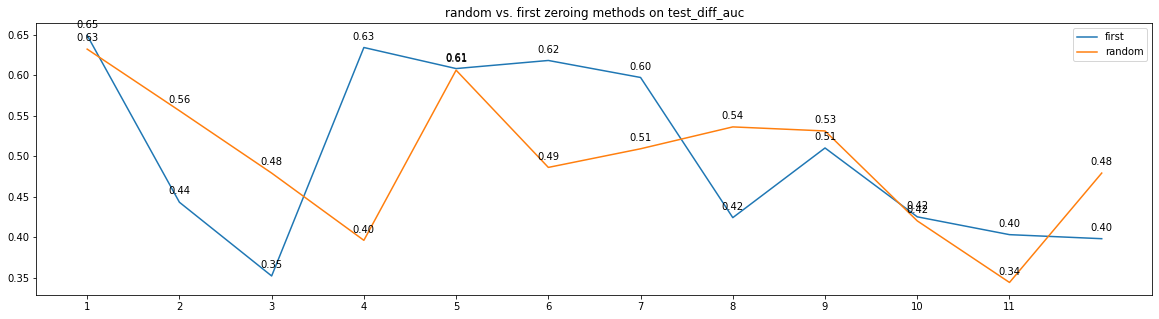

Pearson correction coeffificent: 0.224
p-value: 0.485


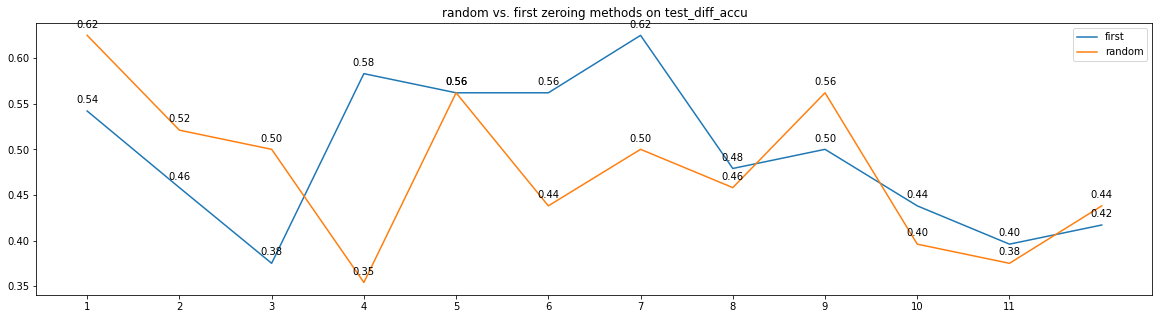

Pearson correction coeffificent: -0.093
p-value: 0.775


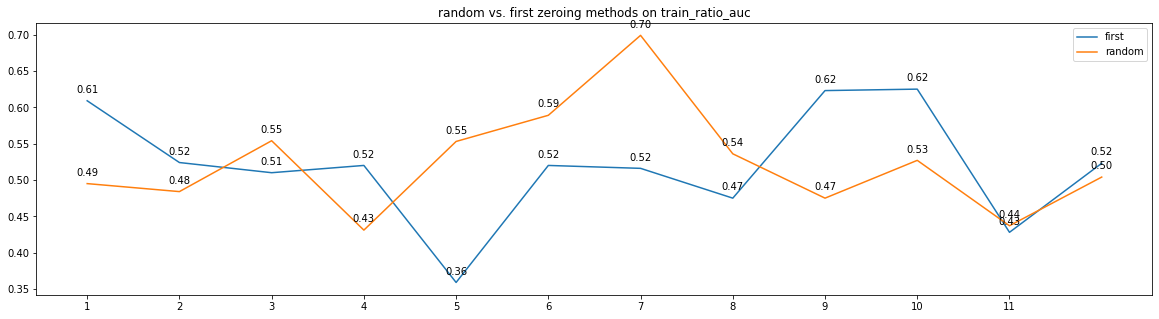

Pearson correction coeffificent: -0.003
p-value: 0.993


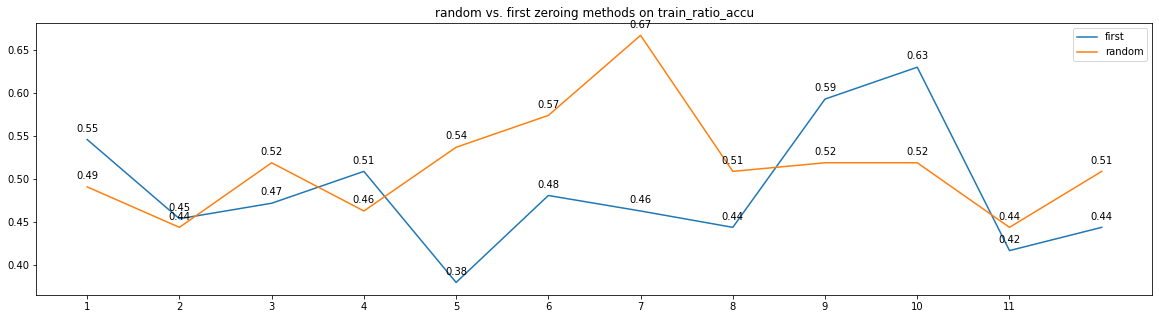

Pearson correction coeffificent: 0.07
p-value: 0.829


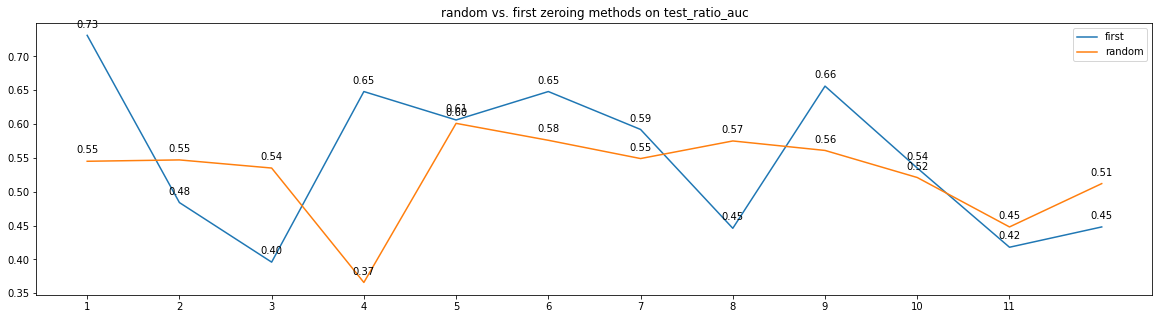

Pearson correction coeffificent: 0.317
p-value: 0.315


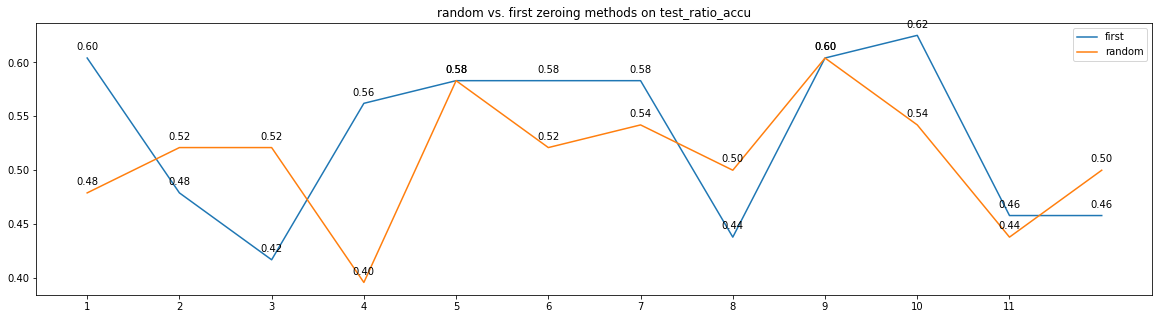

Pearson correction coeffificent: -0.093
p-value: 0.775


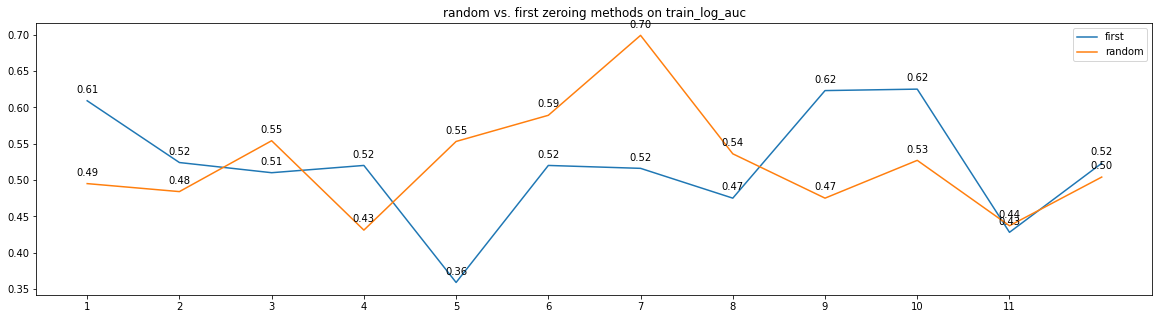

Pearson correction coeffificent: -0.003
p-value: 0.993


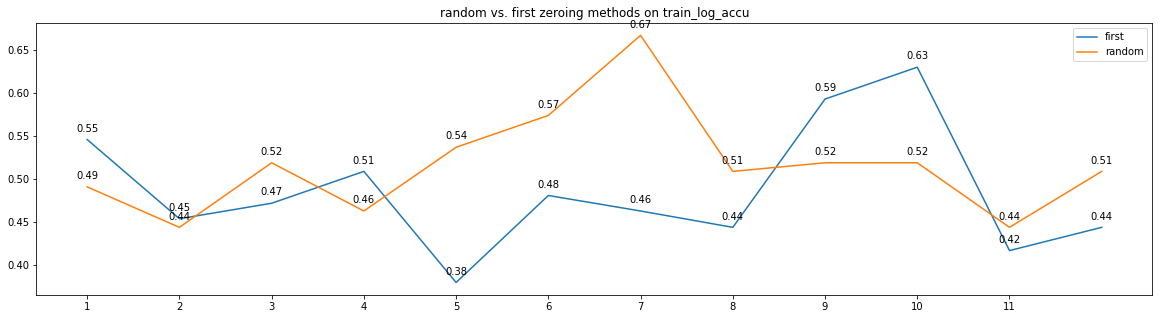

Pearson correction coeffificent: 0.07
p-value: 0.829


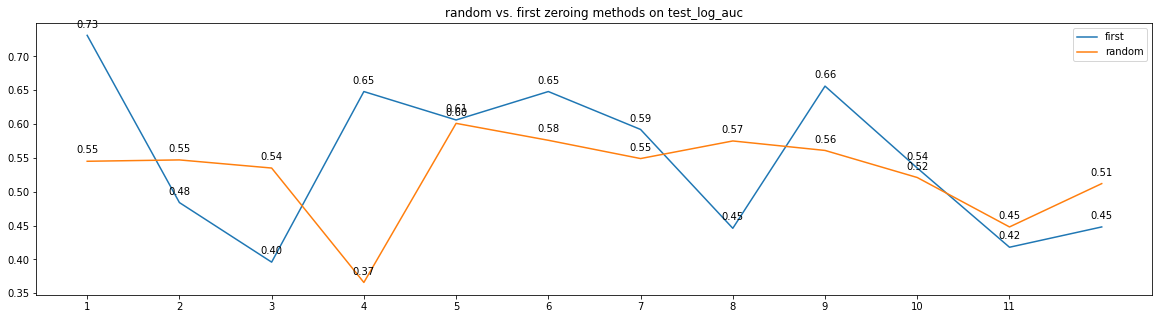

Pearson correction coeffificent: 0.317
p-value: 0.315


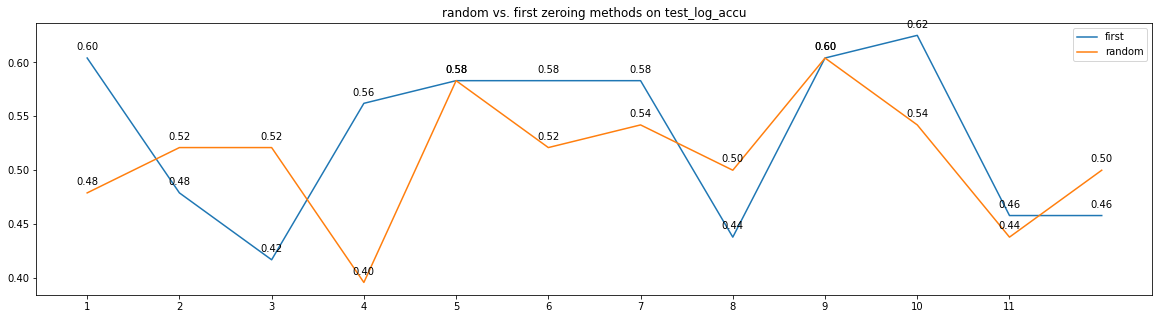

In [24]:
make_plot(25, "full", xasis, "onetime")

Pearson correction coeffificent: nan
p-value: nan


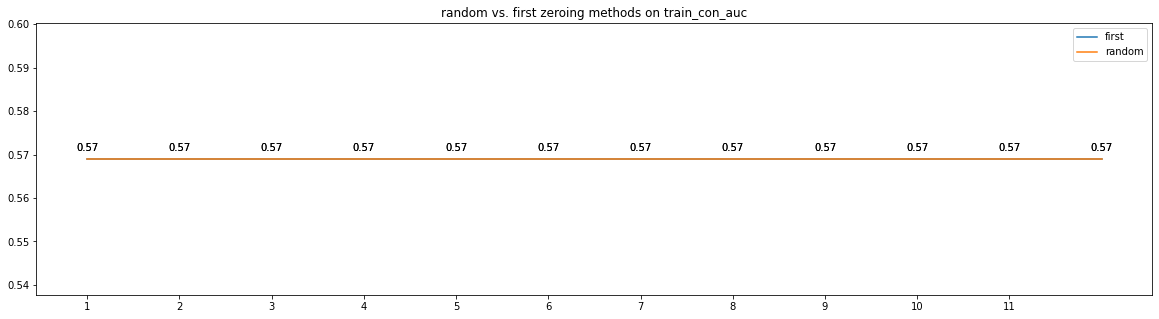

Pearson correction coeffificent: nan
p-value: nan


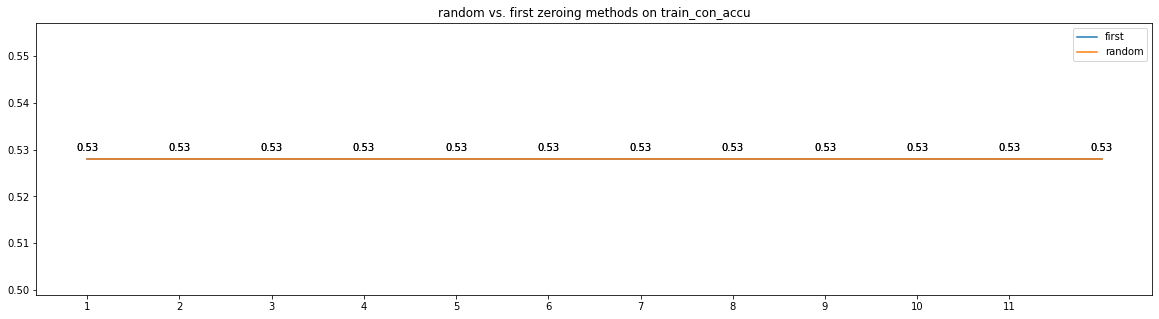

Pearson correction coeffificent: nan
p-value: nan


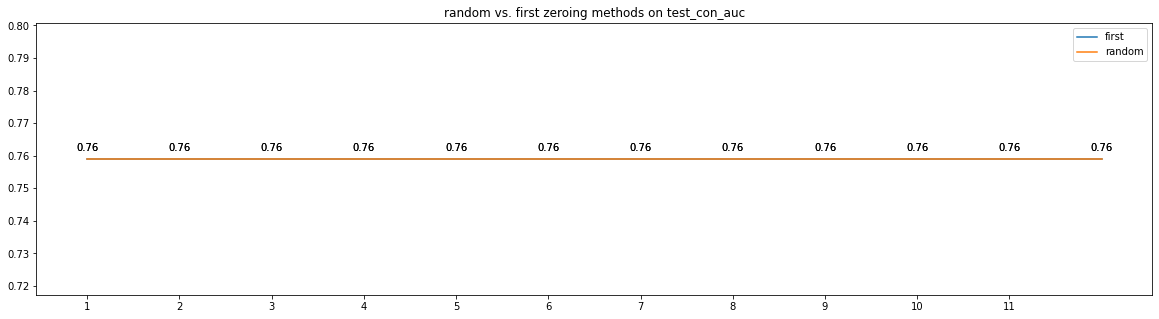

Pearson correction coeffificent: nan
p-value: nan


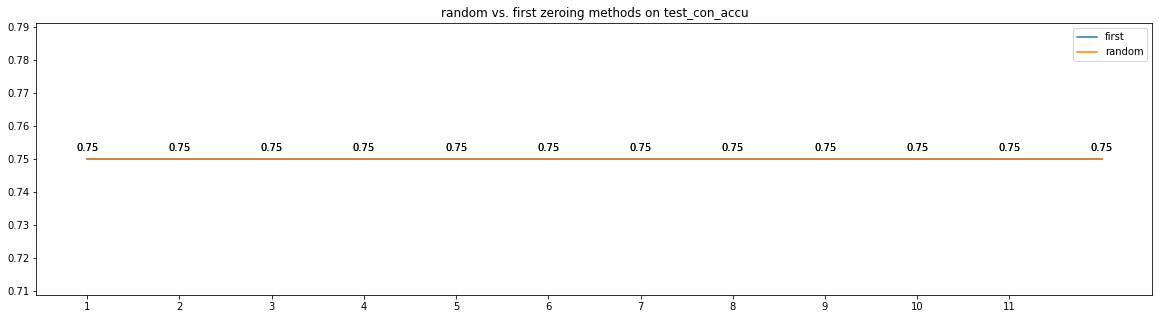

Pearson correction coeffificent: 0.276
p-value: 0.385


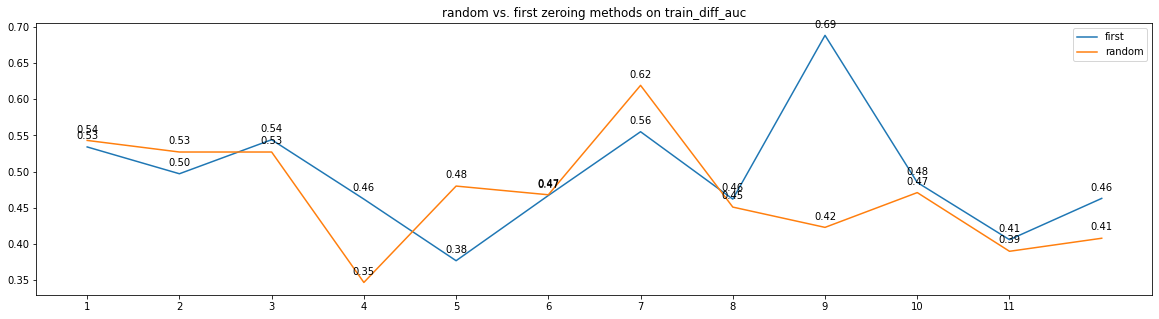

Pearson correction coeffificent: 0.389
p-value: 0.211


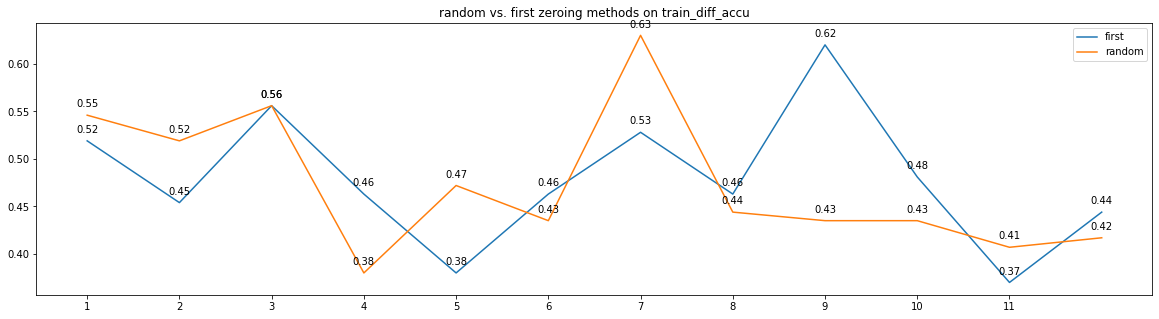

Pearson correction coeffificent: 0.684
p-value: 0.014


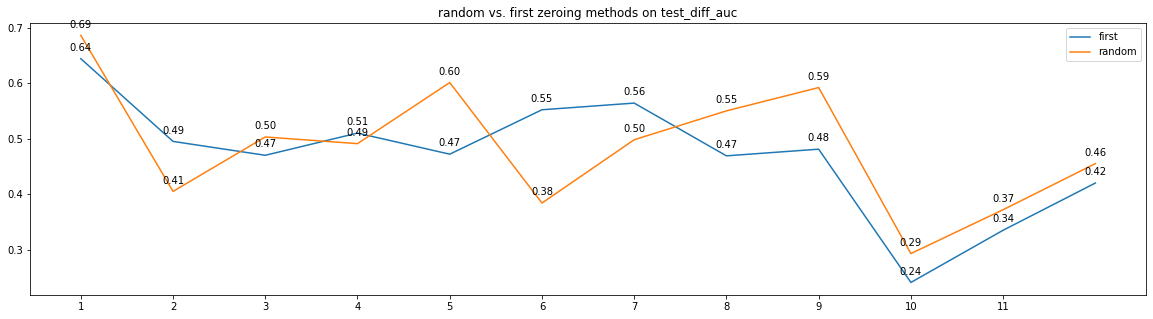

Pearson correction coeffificent: 0.554
p-value: 0.062


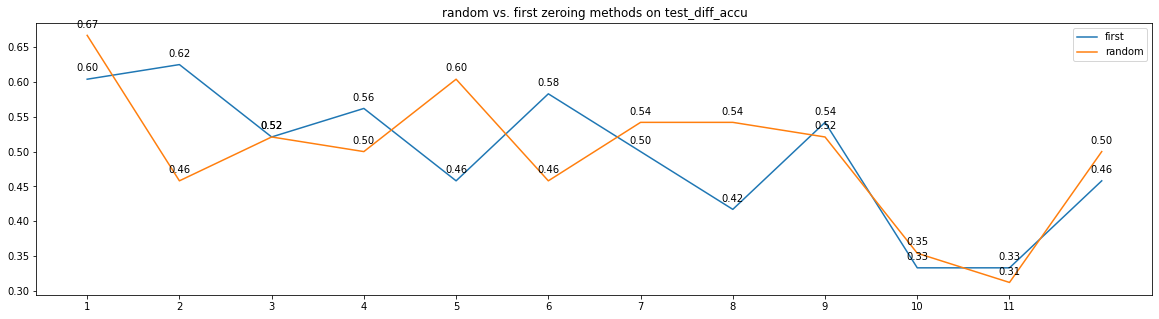

Pearson correction coeffificent: 0.158
p-value: 0.624


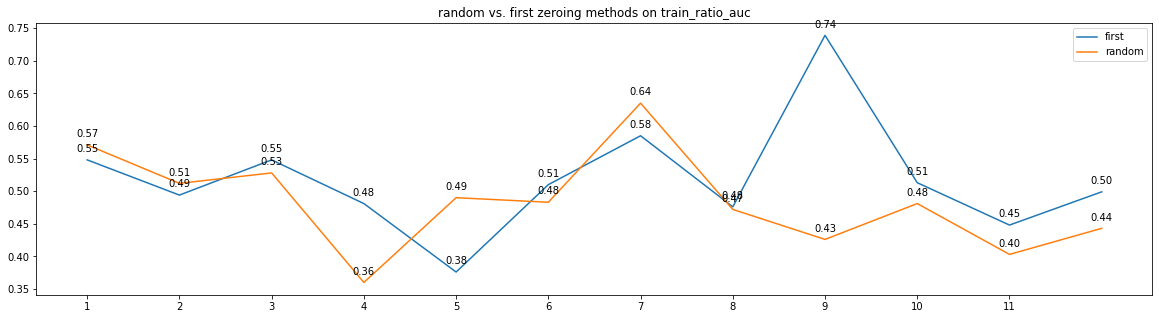

Pearson correction coeffificent: 0.027
p-value: 0.933


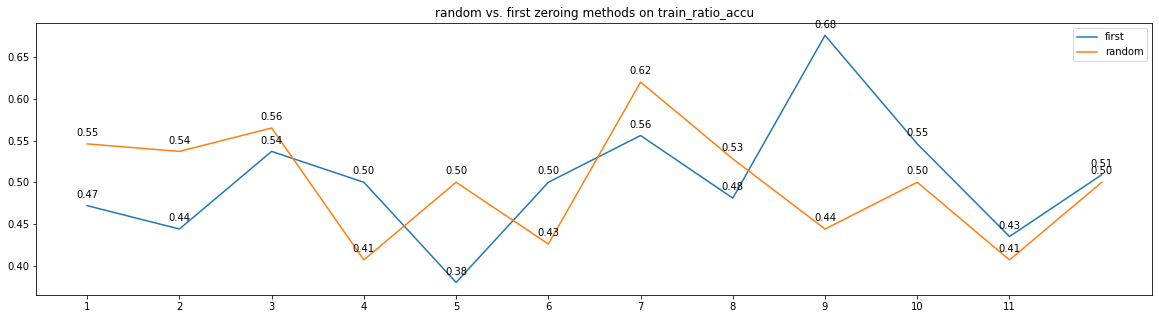

Pearson correction coeffificent: 0.687
p-value: 0.014


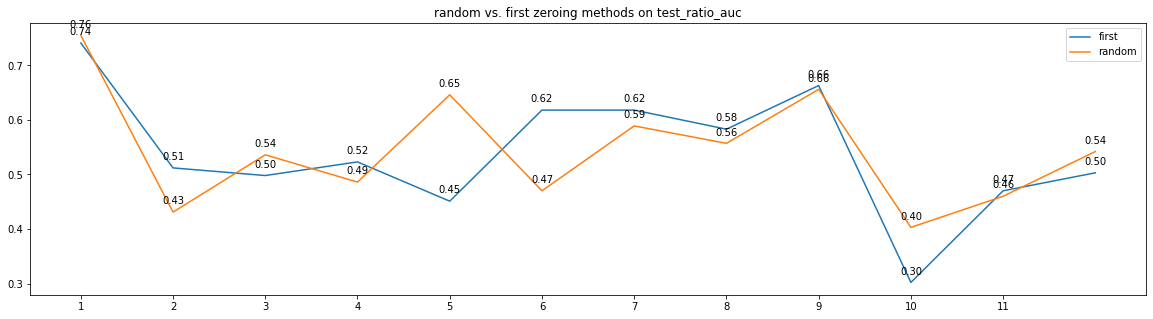

Pearson correction coeffificent: 0.465
p-value: 0.128


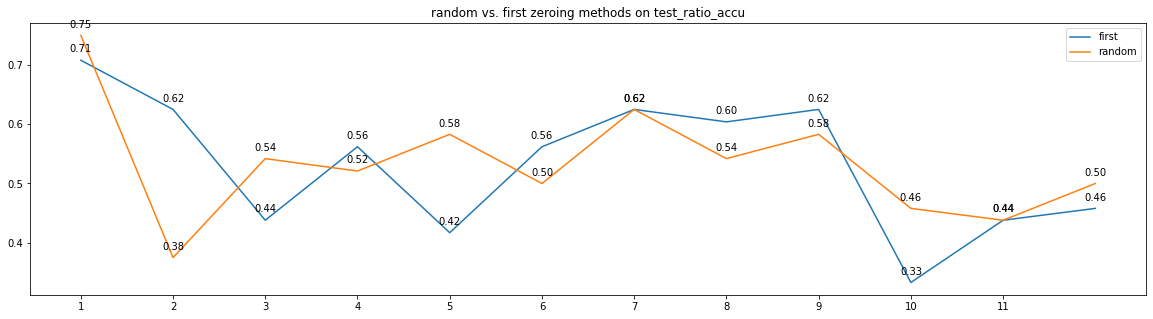

Pearson correction coeffificent: 0.158
p-value: 0.624


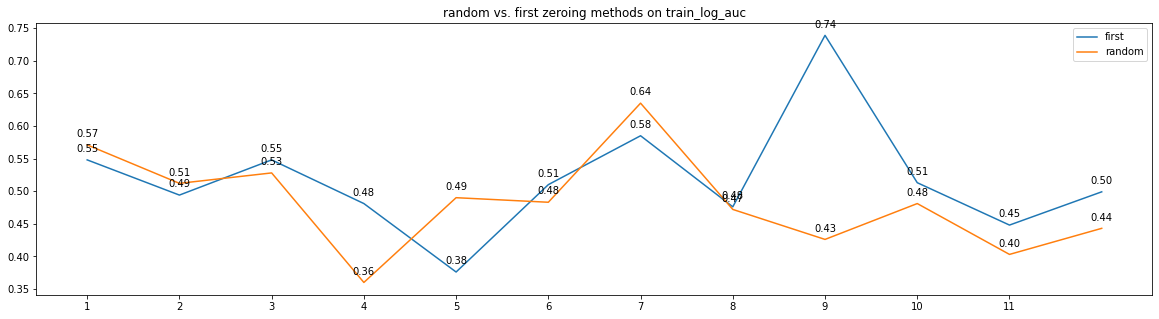

Pearson correction coeffificent: 0.027
p-value: 0.933


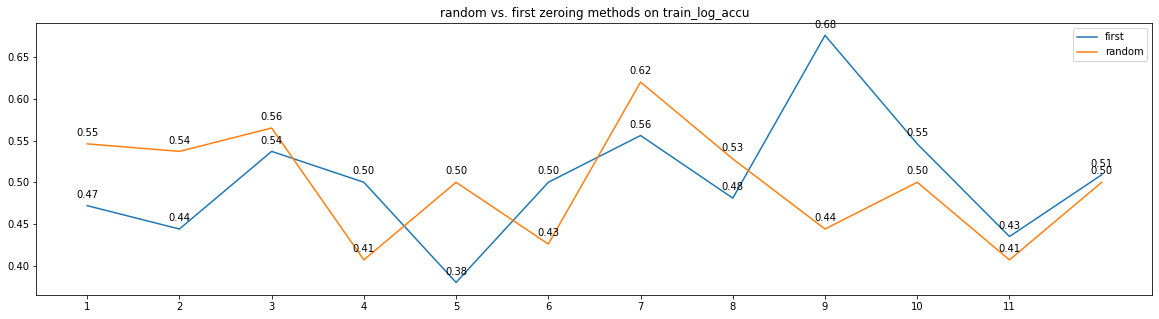

Pearson correction coeffificent: 0.687
p-value: 0.014


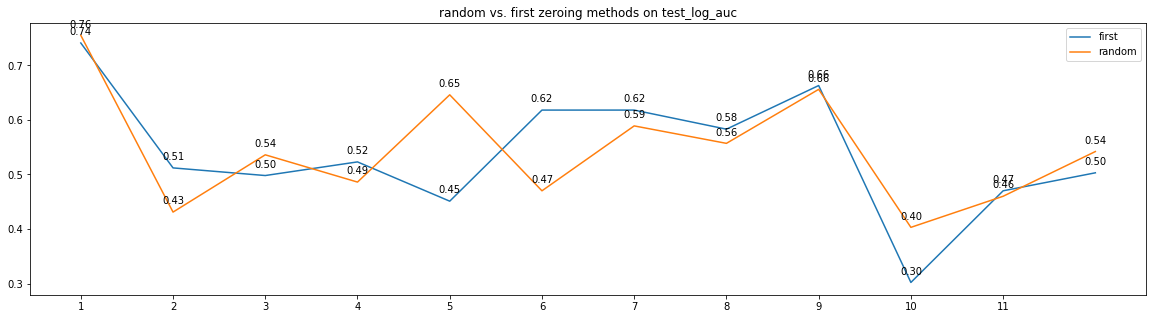

Pearson correction coeffificent: 0.465
p-value: 0.128


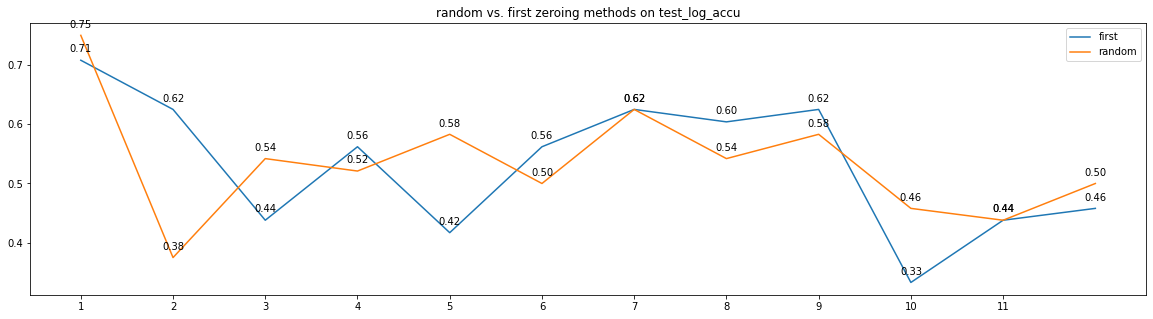

In [26]:
make_plot(50, "full", xasis, "onetime")

Pearson correction coeffificent: nan
p-value: nan


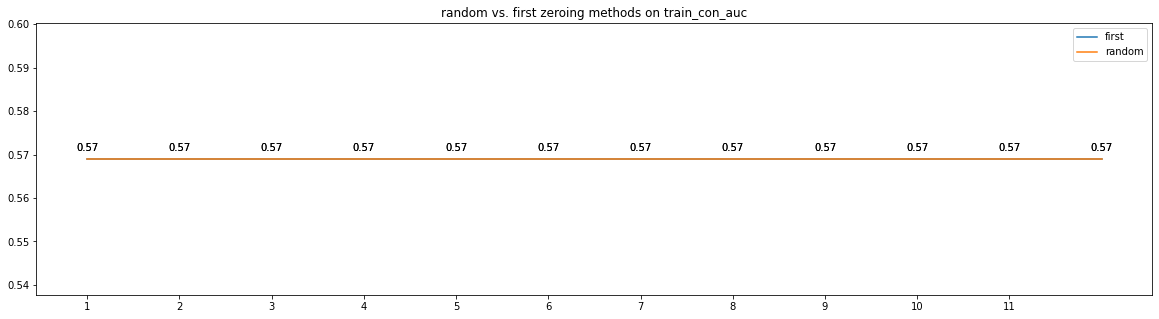

Pearson correction coeffificent: nan
p-value: nan


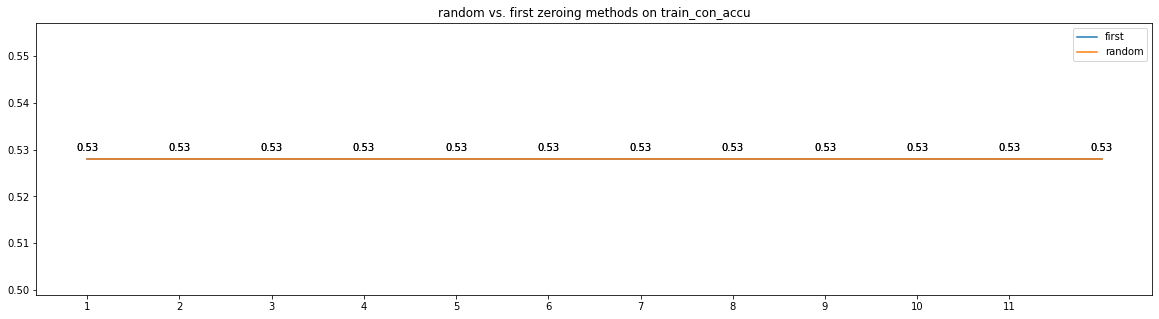

Pearson correction coeffificent: nan
p-value: nan


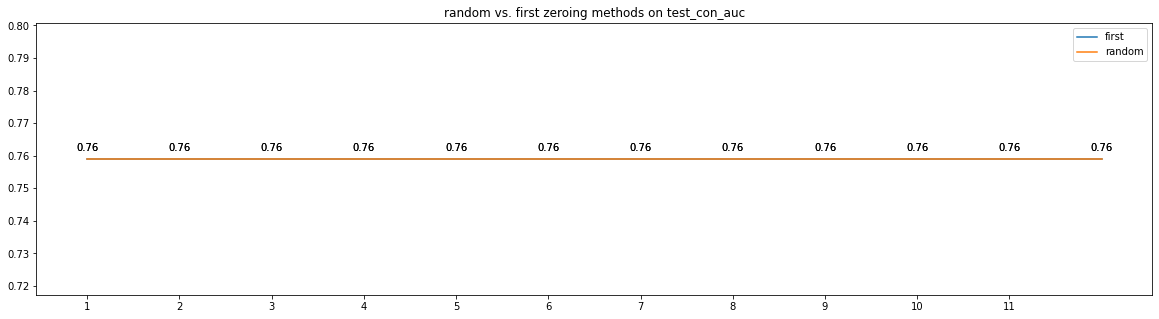

Pearson correction coeffificent: nan
p-value: nan


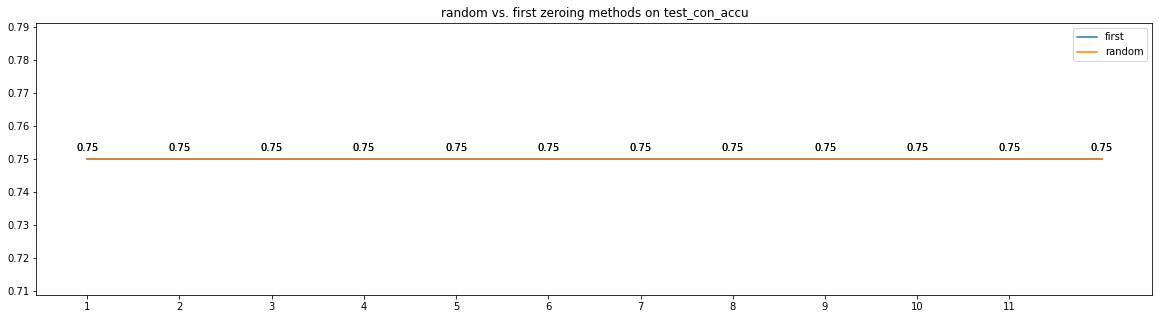

Pearson correction coeffificent: 1.0
p-value: 0.0


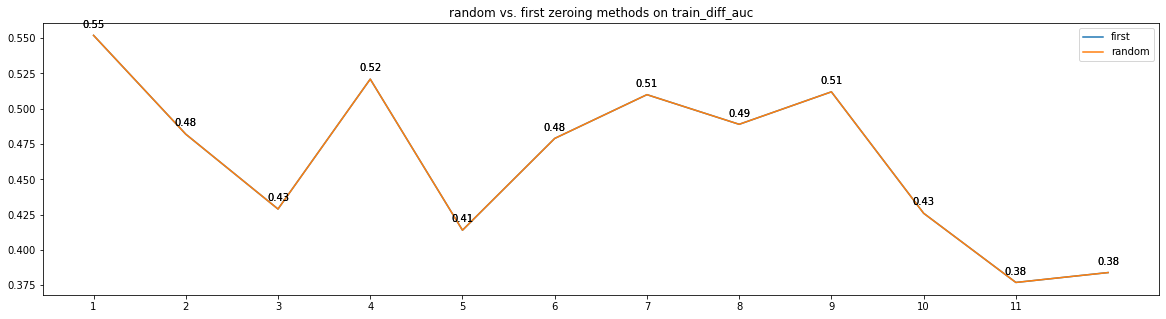

Pearson correction coeffificent: 1.0
p-value: 0.0


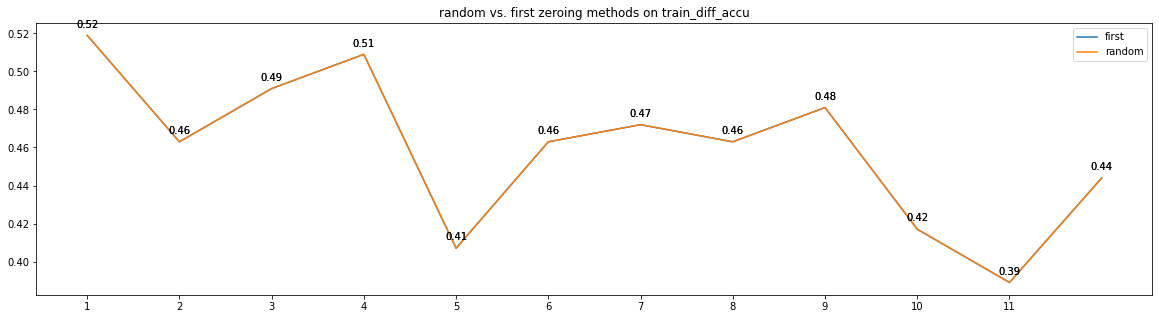

Pearson correction coeffificent: 1.0
p-value: 0.0


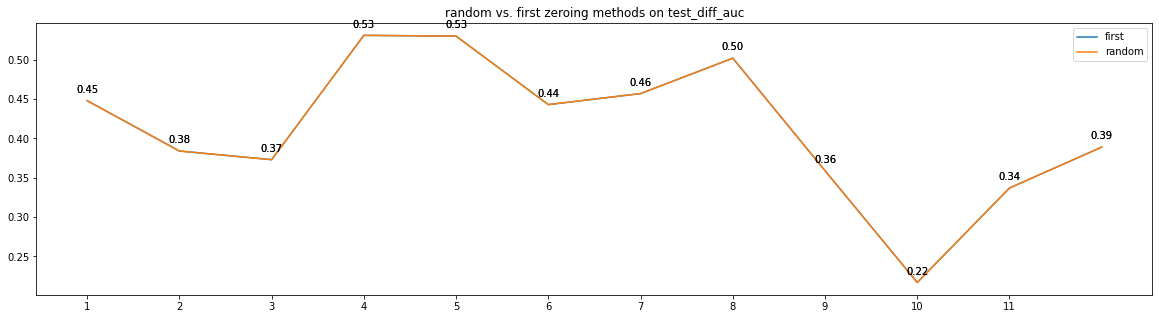

Pearson correction coeffificent: 1.0
p-value: 0.0


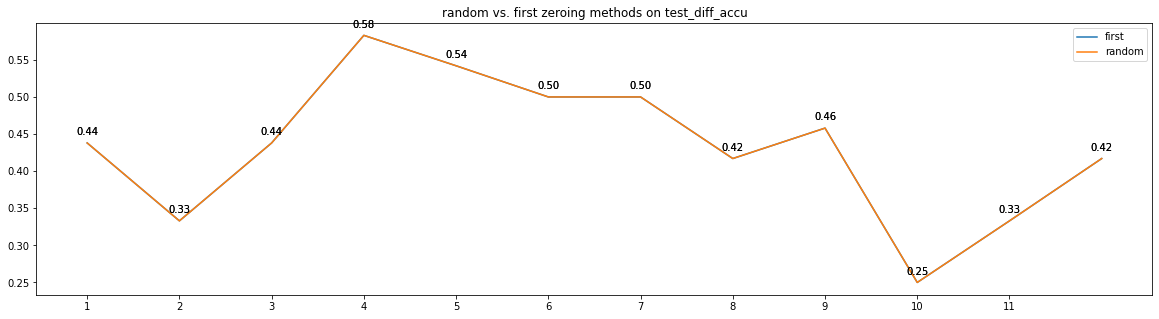

Pearson correction coeffificent: 1.0
p-value: 0.0


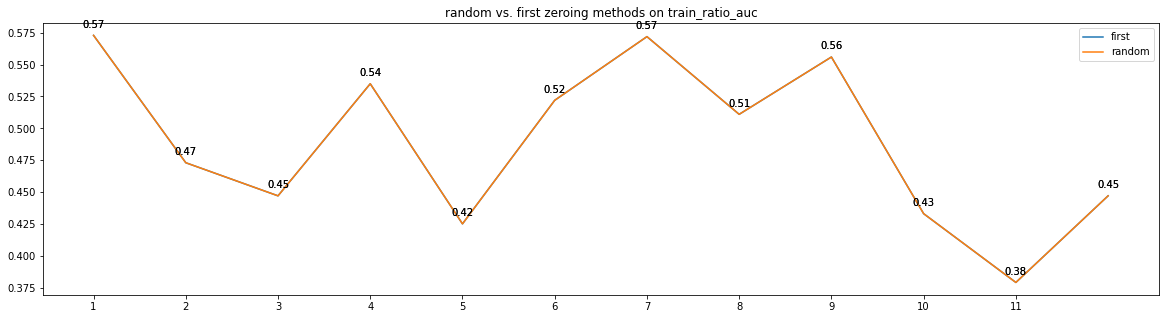

Pearson correction coeffificent: 1.0
p-value: 0.0


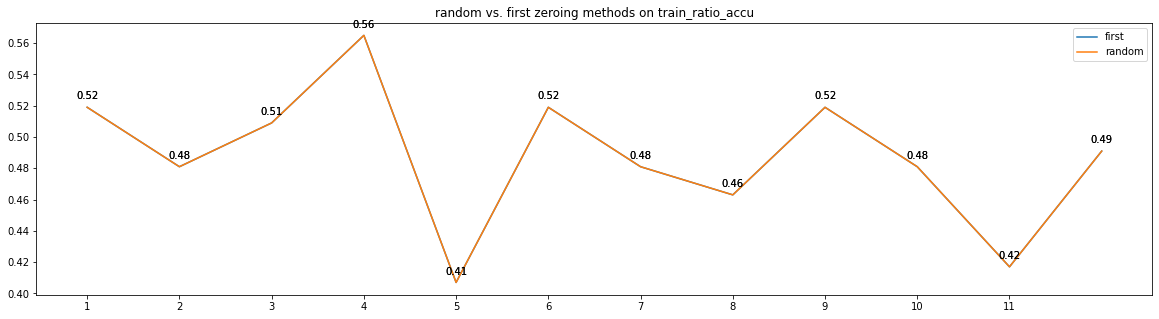

Pearson correction coeffificent: 1.0
p-value: 0.0


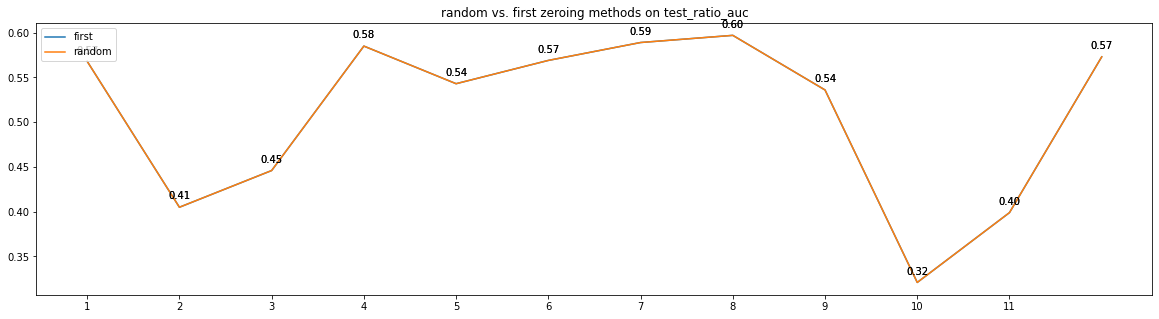

Pearson correction coeffificent: 1.0
p-value: 0.0


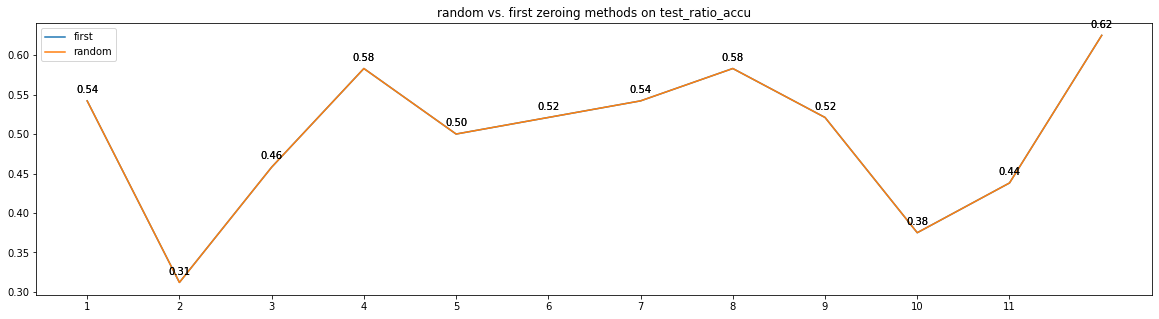

Pearson correction coeffificent: 1.0
p-value: 0.0


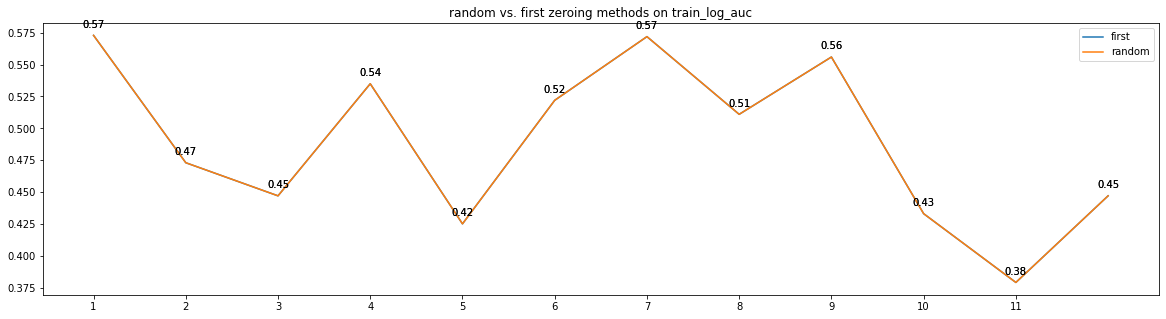

Pearson correction coeffificent: 1.0
p-value: 0.0


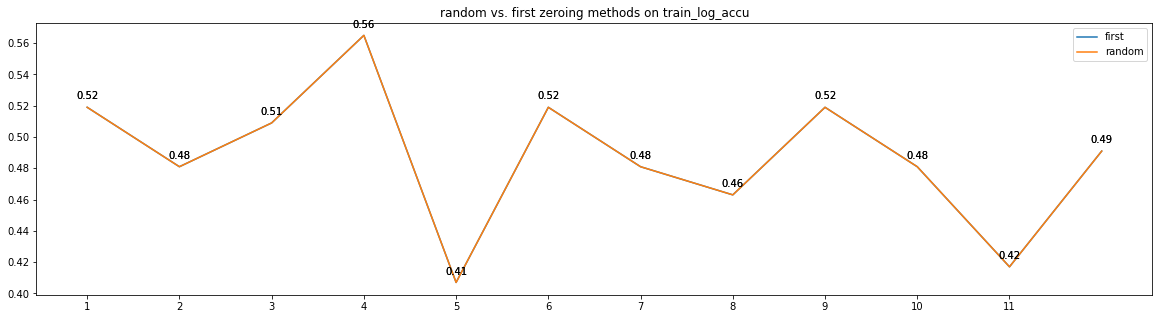

Pearson correction coeffificent: 1.0
p-value: 0.0


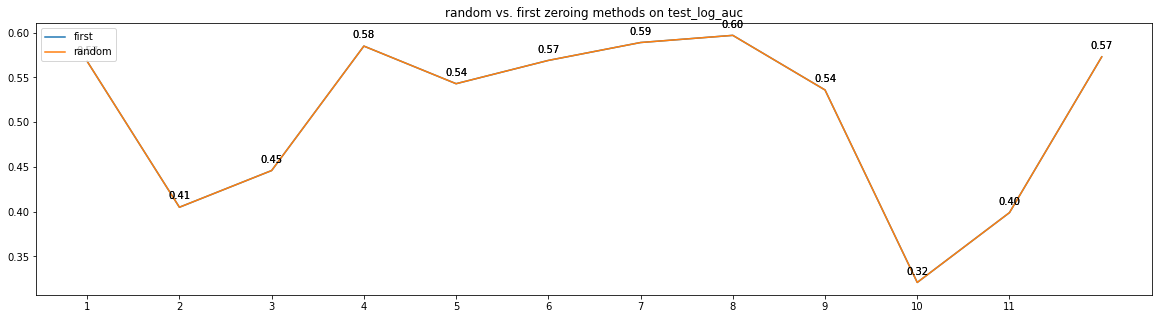

Pearson correction coeffificent: 1.0
p-value: 0.0


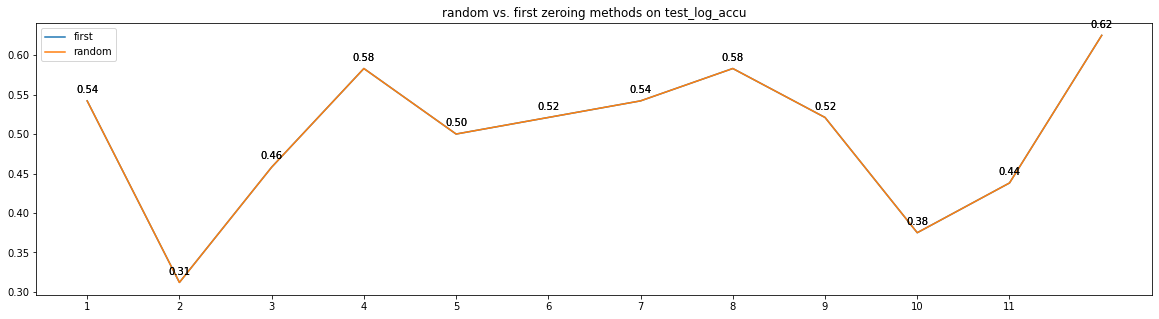

In [28]:
make_plot(100, "full", xasis, "onetime")